In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
!pip install sklearn && touch /root/.ipython/profile_default/startup/00-first.py && echo "import sklearn" >> /root/.ipython/profile_default/startup/00-first.py
!pip list command


  Using cached sklearn-0.0.post7.tar.gz (3.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.5
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.5.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi       

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import scipy.stats as sp
import seaborn as sns
from scipy.stats.stats import pearsonr
from datetime import datetime
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.svm import SVR
from functools import reduce

In [ ]:
#path = "Data_COMP5212project.xlsx"
path = "./drive/MyDrive/5212Project/Data_COMP5212project.xlsx"

In [ ]:
df_er = pd.read_excel (path, sheet_name='ER')
print(df_er)

          Date  USD_CNY  USD_JPY  EUR_USD  USD_CAD  AUD_USD  USD_CHF  GBP_USD
0   1999-01-01   8.2778   116.32   1.1366   1.5105   0.6305   1.4160   1.6458
1   1999-02-01   8.2790   119.17   1.1025   1.5080   0.6188   1.4463   1.6030
2   1999-03-01   8.2800   118.86   1.0770   1.5080   0.6347   1.4825   1.6107
3   1999-04-01   8.2790   119.49   1.0570   1.4565   0.6615   1.5255   1.6095
4   1999-05-01   8.2784   121.52   1.0423   1.4739   0.6488   1.5272   1.6030
..         ...      ...      ...      ...      ...      ...      ...      ...
261 2020-10-01   6.6927   104.64   1.1647   1.3317   0.7026   0.9167   1.2941
262 2020-11-01   6.5789   104.27   1.1928   1.3000   0.7345   0.9090   1.3321
263 2020-12-01   6.5250   103.24   1.2213   1.2730   0.7694   0.8851   1.3673
264 2021-01-01   6.4250   104.68   1.2136   1.2777   0.7642   0.8903   1.3702
265 2021-02-01   6.4730   106.58   1.2074   1.2739   0.7705   0.9082   1.3932

[266 rows x 8 columns]


In [ ]:
df_er['ER_datetime']=pd.to_datetime(df_er['Date'], format='%Y%m%d', errors='raise')

In [ ]:
df_er.head()

,Date,USD_CNY,USD_JPY,EUR_USD,USD_CAD,AUD_USD,USD_CHF,GBP_USD,ER_datetime
0,1999-01-01,8.2778,116.32,1.1366,1.5105,0.6305,1.4160,1.6458,1999-01-01
1,1999-02-01,8.2790,119.17,1.1025,1.5080,0.6188,1.4463,1.6030,1999-02-01
2,1999-03-01,8.2800,118.86,1.0770,1.5080,0.6347,1.4825,1.6107,1999-03-01
3,1999-04-01,8.2790,119.49,1.0570,1.4565,0.6615,1.5255,1.6095,1999-04-01
4,1999-05-01,8.2784,121.52,1.0423,1.4739,0.6488,1.5272,1.6030,1999-05-01


In [ ]:
df_er=df_er.drop(columns='Date')

In [ ]:
df_var = pd.read_excel (path, sheet_name='Variables')
df_var['DLTINT_USEA'] = df_var['LTINT_USA'] - df_var['LTINT_EA19']

In [ ]:
df_var.head()

,Date,Shanghai,SP500,Nikkei225,EuroStoxx50,SPTSX,SPASX200,SMI,FT100,GoldPrice,BrentOilFutures,CPI_CHN,CPI_USA,CPI_JPN,CPI_EU,CPI_CAN,CPI_AUS,CPI_CHE,CPI_GBR,STINT_CHN,STINT_USA,STINT_JPN,STINT_EA19,STINT_CAN,STINT_AUS,STINT_CHE,STINT_GBR,LTINT_CHN,LTINT_USA,LTINT_JPN,LTINT_EA19,LTINT_CAN,LTINT_AUS,LTINT_CHE,LTINT_GBR,DLTINT_USEA
0,1999-01-01,1134.67,1279.64,14499.25,NaN,6729.56,2781.7,7201.2,NaN,286.3,11.35,71.07864,69.31992,99.9,NaN,72.29391,62.96726,91.35076,71.8,4.59,4.89,NaN,3.1321,5.004500,4.79,1.27167,5.92171,NaN,4.72,1.910,3.8220,4.946500,5.127895,2.555,4.2868,0.8980
1,1999-02-01,1090.09,1238.33,14367.54,NaN,6312.69,2768.4,7063.8,NaN,287.5,10.88,71.35999,69.40430,99.5,NaN,72.37292,62.96726,91.65951,71.9,4.59,4.90,NaN,3.0934,5.033500,4.77,1.26167,5.53197,NaN,5.00,2.117,3.9742,5.124000,5.300000,2.550,4.4319,1.0258
2,1999-03-01,1158.05,1286.37,15836.59,NaN,6597.79,2867.0,7130.2,NaN,279.8,15.24,71.00346,69.61526,99.6,NaN,72.68896,62.96726,91.75533,72.3,4.59,4.91,NaN,3.0467,5.057391,4.81,1.24833,5.42287,NaN,5.23,1.816,4.1810,5.220435,5.526522,2.604,4.6554,1.0490
3,1999-04-01,1120.93,1335.18,16701.53,NaN,7014.70,3027.8,7335.5,NaN,286.8,16.57,70.65607,70.12155,100.1,NaN,73.08401,63.24588,91.90840,72.6,4.59,4.88,NaN,2.6965,4.716667,4.76,0.99333,5.31773,NaN,5.18,1.563,4.0407,5.029524,5.357500,2.534,4.5920,1.1393
4,1999-05-01,1279.33,1301.84,16111.65,NaN,6841.80,2831.9,6911.6,NaN,270.4,15.20,69.95301,70.12155,100.1,NaN,73.24203,63.24588,91.70221,72.8,4.59,4.92,NaN,2.5790,4.615500,4.86,1.02333,5.34875,NaN,5.54,1.334,4.2049,5.359500,5.875714,2.720,4.9068,1.3351


In [ ]:
df_var['Var_datetime']=pd.to_datetime(df_var['Date'], format='%Y%m%d', errors='raise')
df_var.head()

,Date,Shanghai,SP500,Nikkei225,EuroStoxx50,SPTSX,SPASX200,SMI,FT100,GoldPrice,BrentOilFutures,CPI_CHN,CPI_USA,CPI_JPN,CPI_EU,CPI_CAN,CPI_AUS,CPI_CHE,CPI_GBR,STINT_CHN,STINT_USA,STINT_JPN,STINT_EA19,STINT_CAN,STINT_AUS,STINT_CHE,STINT_GBR,LTINT_CHN,LTINT_USA,LTINT_JPN,LTINT_EA19,LTINT_CAN,LTINT_AUS,LTINT_CHE,LTINT_GBR,DLTINT_USEA,Var_datetime
0,1999-01-01,1134.67,1279.64,14499.25,NaN,6729.56,2781.7,7201.2,NaN,286.3,11.35,71.07864,69.31992,99.9,NaN,72.29391,62.96726,91.35076,71.8,4.59,4.89,NaN,3.1321,5.004500,4.79,1.27167,5.92171,NaN,4.72,1.910,3.8220,4.946500,5.127895,2.555,4.2868,0.8980,1999-01-01
1,1999-02-01,1090.09,1238.33,14367.54,NaN,6312.69,2768.4,7063.8,NaN,287.5,10.88,71.35999,69.40430,99.5,NaN,72.37292,62.96726,91.65951,71.9,4.59,4.90,NaN,3.0934,5.033500,4.77,1.26167,5.53197,NaN,5.00,2.117,3.9742,5.124000,5.300000,2.550,4.4319,1.0258,1999-02-01
2,1999-03-01,1158.05,1286.37,15836.59,NaN,6597.79,2867.0,7130.2,NaN,279.8,15.24,71.00346,69.61526,99.6,NaN,72.68896,62.96726,91.75533,72.3,4.59,4.91,NaN,3.0467,5.057391,4.81,1.24833,5.42287,NaN,5.23,1.816,4.1810,5.220435,5.526522,2.604,4.6554,1.0490,1999-03-01
3,1999-04-01,1120.93,1335.18,16701.53,NaN,7014.70,3027.8,7335.5,NaN,286.8,16.57,70.65607,70.12155,100.1,NaN,73.08401,63.24588,91.90840,72.6,4.59,4.88,NaN,2.6965,4.716667,4.76,0.99333,5.31773,NaN,5.18,1.563,4.0407,5.029524,5.357500,2.534,4.5920,1.1393,1999-04-01
4,1999-05-01,1279.33,1301.84,16111.65,NaN,6841.80,2831.9,6911.6,NaN,270.4,15.20,69.95301,70.12155,100.1,NaN,73.24203,63.24588,91.70221,72.8,4.59,4.92,NaN,2.5790,4.615500,4.86,1.02333,5.34875,NaN,5.54,1.334,4.2049,5.359500,5.875714,2.720,4.9068,1.3351,1999-05-01


In [ ]:
df_var=df_var.drop(columns='Date')

In [ ]:
df_var["Current_EUR_USD"] = df_er["EUR_USD"].copy()
df_var = df_var[:-1]
df_er = df_er[1:].reset_index(drop=True)
df_all = df_var.copy()
df_all[df_er.columns] = df_er

In [ ]:
df_all = df_all.set_index("Var_datetime")

In [ ]:
df_all.head()

,Shanghai,SP500,Nikkei225,EuroStoxx50,SPTSX,SPASX200,SMI,FT100,GoldPrice,BrentOilFutures,CPI_CHN,CPI_USA,CPI_JPN,CPI_EU,CPI_CAN,CPI_AUS,CPI_CHE,CPI_GBR,STINT_CHN,STINT_USA,STINT_JPN,STINT_EA19,STINT_CAN,STINT_AUS,STINT_CHE,STINT_GBR,LTINT_CHN,LTINT_USA,LTINT_JPN,LTINT_EA19,LTINT_CAN,LTINT_AUS,LTINT_CHE,LTINT_GBR,DLTINT_USEA,Current_EUR_USD,USD_CNY,USD_JPY,EUR_USD,USD_CAD,AUD_USD,USD_CHF,GBP_USD,ER_datetime
Var_datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1999-01-01,1134.67,1279.64,14499.25,NaN,6729.56,2781.7,7201.2,NaN,286.3,11.35,71.07864,69.31992,99.9,NaN,72.29391,62.96726,91.35076,71.8,4.59,4.89,NaN,3.1321,5.004500,4.79,1.27167,5.92171,NaN,4.72,1.910,3.8220,4.946500,5.127895,2.555,4.2868,0.8980,1.1366,8.2790,119.17,1.1025,1.5080,0.6188,1.4463,1.6030,1999-02-01
1999-02-01,1090.09,1238.33,14367.54,NaN,6312.69,2768.4,7063.8,NaN,287.5,10.88,71.35999,69.40430,99.5,NaN,72.37292,62.96726,91.65951,71.9,4.59,4.90,NaN,3.0934,5.033500,4.77,1.26167,5.53197,NaN,5.00,2.117,3.9742,5.124000,5.300000,2.550,4.4319,1.0258,1.1025,8.2800,118.86,1.0770,1.5080,0.6347,1.4825,1.6107,1999-03-01
1999-03-01,1158.05,1286.37,15836.59,NaN,6597.79,2867.0,7130.2,NaN,279.8,15.24,71.00346,69.61526,99.6,NaN,72.68896,62.96726,91.75533,72.3,4.59,4.91,NaN,3.0467,5.057391,4.81,1.24833,5.42287,NaN,5.23,1.816,4.1810,5.220435,5.526522,2.604,4.6554,1.0490,1.0770,8.2790,119.49,1.0570,1.4565,0.6615,1.5255,1.6095,1999-04-01
1999-04-01,1120.93,1335.18,16701.53,NaN,7014.70,3027.8,7335.5,NaN,286.8,16.57,70.65607,70.12155,100.1,NaN,73.08401,63.24588,91.90840,72.6,4.59,4.88,NaN,2.6965,4.716667,4.76,0.99333,5.31773,NaN,5.18,1.563,4.0407,5.029524,5.357500,2.534,4.5920,1.1393,1.0570,8.2784,121.52,1.0423,1.4739,0.6488,1.5272,1.6030,1999-05-01
1999-05-01,1279.33,1301.84,16111.65,NaN,6841.80,2831.9,6911.6,NaN,270.4,15.20,69.95301,70.12155,100.1,NaN,73.24203,63.24588,91.70221,72.8,4.59,4.92,NaN,2.5790,4.615500,4.86,1.02333,5.34875,NaN,5.54,1.334,4.2049,5.359500,5.875714,2.720,4.9068,1.3351,1.0423,8.2787,121.04,1.0357,1.4623,0.6683,1.5480,1.5775,1999-06-01


In [ ]:
df_all.to_csv("df_all.csv",index=False) ##Export the data for future use

In [ ]:
#to use the columns related to USD and EU
df_usdeu=df_all[['EUR_USD', 'SP500', 'EuroStoxx50','GoldPrice', 'BrentOilFutures', 'CPI_USA', 'CPI_EU', 'STINT_USA', 'STINT_EA19', 'LTINT_USA', 'LTINT_EA19', 'DLTINT_USEA', 'Current_EUR_USD']]

In [ ]:
df_usdeu.head()

,EUR_USD,SP500,EuroStoxx50,GoldPrice,BrentOilFutures,CPI_USA,CPI_EU,STINT_USA,STINT_EA19,LTINT_USA,LTINT_EA19,DLTINT_USEA,Current_EUR_USD
Var_datetime,,,,,,,,,,,,,
1999-01-01,1.1025,1279.64,NaN,286.3,11.35,69.31992,NaN,4.89,3.1321,4.72,3.8220,0.8980,1.1366
1999-02-01,1.0770,1238.33,NaN,287.5,10.88,69.40430,NaN,4.90,3.0934,5.00,3.9742,1.0258,1.1025
1999-03-01,1.0570,1286.37,NaN,279.8,15.24,69.61526,NaN,4.91,3.0467,5.23,4.1810,1.0490,1.0770
1999-04-01,1.0423,1335.18,NaN,286.8,16.57,70.12155,NaN,4.88,2.6965,5.18,4.0407,1.1393,1.0570
1999-05-01,1.0357,1301.84,NaN,270.4,15.20,70.12155,NaN,4.92,2.5790,5.54,4.2049,1.3351,1.0423


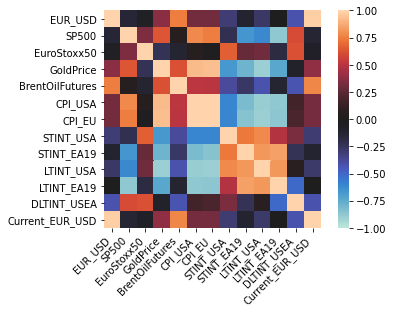

In [ ]:
#correlation heat map

corr_usdeu = df_usdeu.corr()
ax = sns.heatmap(
    corr_usdeu,
    vmin=-1, vmax=1, center=0,
    #cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
df_usdeu.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_usdeu

,EUR_USD,SP500,EuroStoxx50,GoldPrice,BrentOilFutures,CPI_USA,CPI_EU,STINT_USA,STINT_EA19,LTINT_USA,LTINT_EA19,DLTINT_USEA,Current_EUR_USD
Var_datetime,,,,,,,,,,,,,
2003-09-01,1.1584,995.97,2395.87,385.4,27.61,78.13786,79.88,1.08,2.1473,4.27,4.2319,0.0381,1.1660
2003-10-01,1.1994,1050.71,2575.04,384.5,27.70,78.05347,80.03,1.10,2.1436,4.29,4.3081,-0.0181,1.1584
2003-11-01,1.2588,1058.20,2630.47,396.8,28.45,77.84251,80.11,1.11,2.1590,4.30,4.4378,-0.1378,1.1994
2003-12-01,1.2469,1111.92,2760.66,415.7,30.17,77.75813,80.36,1.10,2.1463,4.27,4.3560,-0.0860,1.2588
2004-01-01,1.2490,1131.13,2839.13,402.2,29.18,78.13786,80.30,1.06,2.0895,4.15,4.2567,-0.1067,1.2469
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-01,1.1647,3363.00,3193.61,1907.8,40.95,109.81490,105.73,0.13,-0.4914,0.68,0.1230,0.5570,1.1718
2020-10-01,1.1928,3269.96,2958.21,1892.4,37.46,109.86050,105.92,0.12,-0.5091,0.79,0.0005,0.7895,1.1647
2020-11-01,1.2213,3621.63,3492.54,1784.8,47.59,109.79340,105.63,0.16,-0.5209,0.87,-0.0553,0.9253,1.1928


In [ ]:
usdeu_y=df_usdeu['EUR_USD']
usdeu_x=df_usdeu.drop('EUR_USD', axis=1)

#### XGBoost

In [ ]:
import xgboost as xgb

[15:16:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error: 0.02 degrees.
MAE: 0.019958162059481192
MSE: 0.0008069994935147446
RMSE: 0.028407736508119483
R-squared:  0.9507903376670273
Accuracy: 98.44 %.


Text(0, 0.5, 'Predictions')

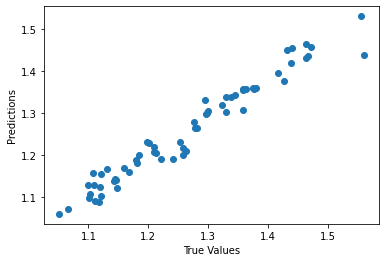

In [ ]:
usdeu_x_train, usdeu_x_valid, usdeu_y_train, usdeu_y_valid = train_test_split(usdeu_x, usdeu_y, test_size = 0.3, random_state=15)

xgb_reg = xgb.XGBRegressor(n_estimators=2000,
                               max_depth=3,
                               learning_rate=0.1,
                               reg_alpha=0.3,
                               reg_lambda=0.3,
                               subsample=0.6,
                               random_state=38)

xgb_reg.fit(usdeu_x_train, usdeu_y_train)

# Use the forest's predict method on the test data
predictions = xgb_reg.predict(usdeu_x_valid)
# Calculate the absolute errors
errors = abs(predictions - usdeu_y_valid)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

print('MAE:', metrics.mean_absolute_error(usdeu_y_valid, predictions))
print('MSE:', metrics.mean_squared_error(usdeu_y_valid, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(usdeu_y_valid, predictions)))
print ('R-squared: ',metrics.r2_score(usdeu_y_valid, predictions))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / usdeu_y_valid)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

plt.scatter(usdeu_y_valid, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

### Deep Learning

In [ ]:
df_usdeu_12m = pd.DataFrame()
for i in range(12):
    df_usdeu_12m[list(map(lambda x: "{}th".format(i+1)+x, df_usdeu.drop("EUR_USD", axis=1).columns))] = df_usdeu.shift(-i).drop("EUR_USD", axis=1)
df_usdeu_12m = df_usdeu_12m.dropna()

In [ ]:
df_usdeu_12m

,1thSP500,1thEuroStoxx50,1thGoldPrice,1thBrentOilFutures,1thCPI_USA,1thCPI_EU,1thSTINT_USA,1thSTINT_EA19,1thLTINT_USA,1thLTINT_EA19,1thDLTINT_USEA,1thCurrent_EUR_USD,2thSP500,2thEuroStoxx50,2thGoldPrice,2thBrentOilFutures,2thCPI_USA,2thCPI_EU,2thSTINT_USA,2thSTINT_EA19,2thLTINT_USA,2thLTINT_EA19,2thDLTINT_USEA,2thCurrent_EUR_USD,3thSP500,3thEuroStoxx50,3thGoldPrice,3thBrentOilFutures,3thCPI_USA,3thCPI_EU,3thSTINT_USA,3thSTINT_EA19,3thLTINT_USA,3thLTINT_EA19,3thDLTINT_USEA,3thCurrent_EUR_USD,4thSP500,4thEuroStoxx50,4thGoldPrice,4thBrentOilFutures,...,9thLTINT_USA,9thLTINT_EA19,9thDLTINT_USEA,9thCurrent_EUR_USD,10thSP500,10thEuroStoxx50,10thGoldPrice,10thBrentOilFutures,10thCPI_USA,10thCPI_EU,10thSTINT_USA,10thSTINT_EA19,10thLTINT_USA,10thLTINT_EA19,10thDLTINT_USEA,10thCurrent_EUR_USD,11thSP500,11thEuroStoxx50,11thGoldPrice,11thBrentOilFutures,11thCPI_USA,11thCPI_EU,11thSTINT_USA,11thSTINT_EA19,11thLTINT_USA,11thLTINT_EA19,11thDLTINT_USEA,11thCurrent_EUR_USD,12thSP500,12thEuroStoxx50,12thGoldPrice,12thBrentOilFutures,12thCPI_USA,12thCPI_EU,12thSTINT_USA,12thSTINT_EA19,12thLTINT_USA,12thLTINT_EA19,12thDLTINT_USEA,12thCurrent_EUR_USD
Var_datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-09-01,995.97,2395.87,385.4,27.61,78.13786,79.88,1.08,2.1473,4.27,4.2319,0.0381,1.1660,1050.71,2575.04,384.5,27.70,78.05347,80.03,1.10,2.1436,4.29,4.3081,-0.0181,1.1584,1058.20,2630.47,396.8,28.45,77.84251,80.11,1.11,2.1590,4.30,4.4378,-0.1378,1.1994,1111.92,2760.66,415.7,30.17,...,4.72,4.3862,0.3338,1.2186,1140.84,2811.08,392.6,34.50,80.03645,81.75,1.46,2.1127,4.73,4.4426,0.2874,1.2187,1101.72,2720.05,391.0,40.03,79.90988,81.62,1.57,2.1160,4.50,4.3396,0.1604,1.2020,1104.24,2670.79,410.4,39.61,79.95207,81.74,1.68,2.1143,4.28,4.1679,0.1121,1.2188
2003-10-01,1050.71,2575.04,384.5,27.70,78.05347,80.03,1.10,2.1436,4.29,4.3081,-0.0181,1.1584,1058.20,2630.47,396.8,28.45,77.84251,80.11,1.11,2.1590,4.30,4.4378,-0.1378,1.1994,1111.92,2760.66,415.7,30.17,77.75813,80.36,1.10,2.1463,4.27,4.3560,-0.0860,1.2588,1131.13,2839.13,402.2,29.18,...,4.73,4.4426,0.2874,1.2187,1101.72,2720.05,391.0,40.03,79.90988,81.62,1.57,2.1160,4.50,4.3396,0.1604,1.2020,1104.24,2670.79,410.4,39.61,79.95207,81.74,1.68,2.1143,4.28,4.1679,0.1121,1.2188,1114.58,2726.30,418.7,46.38,80.12083,81.86,1.86,2.1186,4.13,4.1140,0.0160,1.2432
2003-11-01,1058.20,2630.47,396.8,28.45,77.84251,80.11,1.11,2.1590,4.30,4.4378,-0.1378,1.1994,1111.92,2760.66,415.7,30.17,77.75813,80.36,1.10,2.1463,4.27,4.3560,-0.0860,1.2588,1131.13,2839.13,402.2,29.18,78.13786,80.30,1.06,2.0895,4.15,4.2567,-0.1067,1.2469,1144.94,2893.18,396.4,32.23,...,4.50,4.3396,0.1604,1.2020,1104.24,2670.79,410.4,39.61,79.95207,81.74,1.68,2.1143,4.28,4.1679,0.1121,1.2188,1114.58,2726.30,418.7,46.38,80.12083,81.86,1.86,2.1186,4.13,4.1140,0.0160,1.2432,1130.20,2811.72,428.5,48.98,80.54275,82.20,2.04,2.1473,4.10,3.9794,0.1206,1.2785
2003-12-01,1111.92,2760.66,415.7,30.17,77.75813,80.36,1.10,2.1463,4.27,4.3560,-0.0860,1.2588,1131.13,2839.13,402.2,29.18,78.13786,80.30,1.06,2.0895,4.15,4.2567,-0.1067,1.2469,1144.94,2893.18,396.4,32.23,78.55977,80.50,1.05,2.0705,4.08,4.1833,-0.1033,1.2490,1126.21,2787.49,427.3,31.51,...,4.28,4.1679,0.1121,1.2188,1114.58,2726.30,418.7,46.38,80.12083,81.86,1.86,2.1186,4.13,4.1140,0.0160,1.2432,1130.20,2811.72,428.5,48.98,80.54275,82.20,2.04,2.1473,4.10,3.9794,0.1206,1.2785,1173.82,2876.39,451.3,45.51,80.58494,82.15,2.26,2.1703,4.19,3.8687,0.3213,1.3293
2004-01-01,1131.13,2839.13,402.2,29.18,78.13786,80.30,1.06,2.0895,4.15,4.2567,-0.1067,1.2469,1144.94,2893.18,396.4,32.23,78.55977,80.50,1.05,2.0705,4.08,4.1833,-0.1033,1.2490,1126.21,2787.49,427.3,31.51,79.06606,80.98,1.05,2.0288,3.83,4.0194,-0.1894,1.2315,1107.30,2787.48,387.0,34.48,...,4.13,4.1140,0.0160,1.2432,1130.20,2811.72,428.5,48.98,80.54275,82.20,2.04,2.1473,4.10,3.9794,0.1206,1.2785,1173.82,2876.39,451.3,45.51,80.58494,82.15,2.26,2.1703,4.19,3.8687,0.3213,1.3293,1211.92,2951.01,437.5,40.46,80.28960,82.43,2.45,2.1

In [ ]:
usdeu_12m_x = df_usdeu_12m
usdeu_12m_y = df_usdeu["EUR_USD"]["2004-08-01":]

In [ ]:
usdeu_12m_y

Var_datetime
2004-08-01    1.2432
2004-09-01    1.2785
2004-10-01    1.3293
2004-11-01    1.3558
2004-12-01    1.3034
               ...  
2020-09-01    1.1647
2020-10-01    1.1928
2020-11-01    1.2213
2020-12-01    1.2136
2021-01-01    1.2074
Name: EUR_USD, Length: 198, dtype: float64

In [ ]:
import torch
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils import weight_norm
import random
torch.use_deterministic_algorithms(True) ## For Reproducibility

In [ ]:
class DataSet(Dataset):
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
        self.len = len(x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx], self.z[idx]

    def __len__(self):
        return self.len

class MSE_Sim_loss(torch.nn.Module):
    def __init__(self, alpha=1, beta=1):
        super().__init__()
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.to(self.device)
        self.alpha = alpha
        self.beta = beta

    def forward(self, pred, y_true, current):
        true_diff = y_true.view(-1) - current.view(-1)
        pred_diff = pred.view(-1) - current.view(-1)
        similarity = true_diff.dot(pred_diff)/(torch.norm(true_diff)*torch.norm(pred_diff))
        MSEloss = torch.nn.L1Loss().to(self.device)
        return self.alpha*MSEloss(pred, y_true) + self.beta*(1 - similarity)


class LSTM_model(torch.nn.Module):
    def __init__(self, input_size=12, hidden_size=12, num_layers=3, middle_feature=20, seed=None):
        super().__init__()
        if seed != None:
            torch.manual_seed(seed)
        self.lstm = torch.nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True, )
        self.linear = torch.nn.Linear(in_features=12*hidden_size, out_features=middle_feature)
        self.outlayer = torch.nn.Linear(in_features=middle_feature, out_features=1)
        self.normlayer = torch.nn.InstanceNorm1d(12)
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.to(self.device)
        self.loss_hist = []
        self.state_dict_hist = []

    def forward(self, x):
        x, (hn, cn) = self.lstm(x)
        x = self.normlayer(x)
        x = F.relu(x)
        x = x.reshape(x.shape[0], -1)
        x = self.linear(x)
        x = F.relu(x)
        x = self.outlayer(x)
        return x

    def fit(self, x, y, z, epochs=20, lr=0.001, alpha=1, beta=1, batch_size=None, shuffle=True):
        if isinstance(x, pd.DataFrame) or isinstance(x, pd.Series):
            x = torch.from_numpy(x.values.reshape(-1, 12, 12)).float().to(self.device)
        elif isinstance(x, np.ndarray):
            x = torch.from_numpy(x.reshape(-1, 12, 12)).float().to(self.device)
        else:
            x = torch.tensor(x).view(-1,12,12).float().to(self.device)
        if isinstance(y, pd.DataFrame) or isinstance(y, pd.Series):
            y = torch.from_numpy(y.values.reshape(-1, 1)).float().to(self.device)
        elif isinstance(x, np.ndarray):
            y = torch.from_numpy(y.reshape(-1, 1)).float().to(self.device)
        else:
            y = torch.tensor(y).view(-1, 1).float().to(self.device)
        if isinstance(z, pd.DataFrame) or isinstance(z, pd.Series):
            z = torch.from_numpy(z.values.reshape(-1, 1)).float().to(self.device)
        elif isinstance(z, np.ndarray):
            z = torch.from_numpy(z.reshape(-1, 1)).float().to(self.device)
        else:
            z = torch.tensor(z).view(-1, 1).float().to(self.device)
        if batch_size == None:
            batch_size = len(x)//10
        dataset = DataSet(x,y,z)
        dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)
        lossfn = MSE_Sim_loss(alpha=alpha, beta=beta)
        optimizer = torch.optim.Adam(self.parameters(), lr=lr)
        i = 0
        for i in range(epochs):
            epoch_loss = []
            for x, y, z in dataloader:
                optimizer.zero_grad()
                pred = self.forward(x)
                l = lossfn(pred, y, z)
                l.backward()
                epoch_loss.append(l.item())
                optimizer.step()

            print("loss: ", sum(epoch_loss)/len(epoch_loss))
            self.loss_hist.append(sum(epoch_loss)/len(epoch_loss))
            self.state_dict_hist.append(self.state_dict())


    def load_best_state_dict(self):
        state_dict = self.state_dict_hist[self.loss_hist.index(min(self.loss_hist))]
        self.load_state_dict(state_dict)
        return

    def predict(self, x):
        if isinstance(x, pd.DataFrame) or isinstance(x, pd.Series):
            x = torch.from_numpy(x.values.reshape(-1, 12, 12)).float().to(self.device)
        elif isinstance(x, np.ndarray):
            x = torch.from_numpy(x.reshape(-1, 12, 12)).float().to(self.device)
        else:
            x = torch.tensor(x).view(-1,12,12).float().to(self.device)

        pred = self.forward(x)
        return pred.view(-1).detach().cpu().numpy()

loss:  1.9618701392954045
loss:  1.3539238951422952
loss:  0.9406222646886652
loss:  0.8281055255369707
loss:  0.7709893204949119
loss:  0.7269224280660803
loss:  0.6687471189282157
loss:  0.6913550712845542
loss:  0.6006346101110632
loss:  0.6052456010471691
loss:  0.5685842091386969
loss:  0.5849454186179421
loss:  0.5791949277574365
loss:  0.5647860359061848
loss:  0.50075409358198
loss:  0.5451624366370115
loss:  0.5608673922040246
loss:  0.49395852197300305
loss:  0.3993324921889739
loss:  0.42047191478989343
Mean Absolute Error: 0.05 degrees.
MAE: 0.04713294773419698
MSE: 0.004048027888704336
RMSE: 0.06362411405044738
R-squared:  0.7430918931899506
Accuracy: 96.28 %.


Text(0, 0.5, 'Predictions')

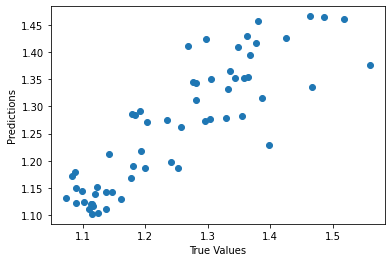

In [ ]:
usdeu12m_x_train, usdeu12m_x_valid, usdeu12m_y_train, usdeu12m_y_valid = train_test_split(usdeu_12m_x, usdeu_12m_y, test_size = 0.3, random_state=3)
current = usdeu12m_x_train["12thCurrent_EUR_USD"]
lstm_model = LSTM_model(hidden_size=250,  num_layers=3, middle_feature=250, seed=4)
lstm_model.fit(x=usdeu12m_x_train, y=usdeu12m_y_train, z=current, epochs=20, lr=0.00001)
lstm_model.load_best_state_dict()
predictions = lstm_model.predict(usdeu12m_x_valid)
# Use the forest's predict method on the test data
# Calculate the absolute errors
errors = abs(predictions - usdeu12m_y_valid)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

print('MAE:', metrics.mean_absolute_error(usdeu12m_y_valid, predictions))
print('MSE:', metrics.mean_squared_error(usdeu12m_y_valid, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(usdeu12m_y_valid, predictions)))
print ('R-squared: ',metrics.r2_score(usdeu12m_y_valid, predictions))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / usdeu12m_y_valid)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
plt.scatter(usdeu12m_y_valid, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

### TCNN

In [ ]:
usdeu_t_12m_x = usdeu_12m_x[["{}th".format(i+1) + "Current_EUR_USD" for i in range(12)]]

In [ ]:
class Temporal_block(torch.nn.Module):
    def __init__(self, dilation_size):
        super().__init__()
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.to(self.device)
        self.padding = torch.nn.ConstantPad1d((dilation_size*2,0),0)
        self.conv1d_1 = weight_norm(torch.nn.Conv1d(in_channels=1, out_channels=1, kernel_size=3, dilation=dilation_size))
        self.conv1d_2 = weight_norm(torch.nn.Conv1d(in_channels=1, out_channels=1, kernel_size=3, dilation=dilation_size))

    def forward(self, x):
        out = self.conv1d_1(x)
        out = F.relu(self.padding(out))
        out = self.conv1d_2(out)
        out = F.relu(self.padding(out))
        return F.relu(out+x)


class TCNN(torch.nn.Module):
    def __init__(self, seed=None):
        super().__init__()
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        if seed != None:
          torch.manual_seed(seed)

        self.temp_block_d1 = Temporal_block(dilation_size=1)
        self.temp_block_d2 = Temporal_block(dilation_size=2)
        self.temp_block_d4 = Temporal_block(dilation_size=4)
        self.linear = torch.nn.Linear(12, 1)
        self.to(self.device)
        self.loss_hist = []
        self.state_dict_hist = []

    def forward(self, x):
        x = self.temp_block_d1(x)
        x = self.temp_block_d2(x)
        x = self.temp_block_d4(x)
        x = x.view(x.shape[0],-1)
        x = F.relu(self.linear(x))
        return x

    def fit(self, x, y, z,epochs=20, lr=0.001, alpha=1, beta=1,  batch_size=None, shuffle=True):
        if isinstance(x, pd.DataFrame) or isinstance(x, pd.Series):
            x = torch.from_numpy(x.values.reshape(-1, 1, 12)).float().to(self.device)
        elif isinstance(x, np.ndarray):
            x = torch.from_numpy(x.reshape(-1, 1, 12)).float().to(self.device)
        else:
            x = torch.tensor(x).view(-1, 1, 12).float().to(self.device)
        if isinstance(y, pd.DataFrame) or isinstance(y, pd.Series):
            y = torch.from_numpy(y.values.reshape(-1, 1)).float().to(self.device)
        elif isinstance(x, np.ndarray):
            y = torch.from_numpy(y.reshape(-1, 1)).float().to(self.device)
        else:
            y = torch.tensor(y).view(-1, 1).float().to(self.device)
        if isinstance(z, pd.DataFrame) or isinstance(z, pd.Series):
            z = torch.from_numpy(z.values.reshape(-1, 1)).float().to(self.device)
        elif isinstance(z, np.ndarray):
            z = torch.from_numpy(z.reshape(-1, 1)).float().to(self.device)
        else:
            z = torch.tensor(z).view(-1, 1).float().to(self.device)

        if batch_size == None:
            batch_size = len(x)//10
        lossfn = MSE_Sim_loss(alpha=alpha, beta=beta)
        optimizer = torch.optim.RMSprop(self.parameters(), lr=lr)
        dataset = DataSet(x,y,z)
        dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)
        i = 0
        for i in range(epochs):
            epoch_loss = []
            for x, y, z in dataloader:
                optimizer.zero_grad()
                pred = self.forward(x)
                l = lossfn(pred, y, z)
                l.backward()
                epoch_loss.append(l.item())
                optimizer.step()

            print("loss: ", sum(epoch_loss)/len(epoch_loss))
            self.loss_hist.append(sum(epoch_loss)/len(epoch_loss))
            self.state_dict_hist.append(self.state_dict())

    def predict(self, x):
        if isinstance(x, pd.DataFrame) or isinstance(x, pd.Series):
            x = torch.from_numpy(x.values.reshape(-1, 1, 12)).float().to(self.device)
        elif isinstance(x, np.ndarray):
            x = torch.from_numpy(x.reshape(-1, 1, 12)).float().to(self.device)
        else:
            x = torch.tensor(x).view(-1, 1, 12).float().to(self.device)

        pred = self.forward(x)
        return pred.view(-1).detach().cpu().numpy()

    def load_best_state_dict(self):
        state_dict = self.state_dict_hist[self.loss_hist.index(min(self.loss_hist))]
        self.load_state_dict(state_dict)
        return

loss:  1.5712929205460981
loss:  1.1670065847310154
loss:  1.083607093854384
loss:  1.0184281034903093
loss:  1.051011860370636
loss:  0.9941171678629789
loss:  1.051041223786094
loss:  1.10965158180757
loss:  1.048257914456454
loss:  1.0179675925861706
loss:  1.0416060848669573
loss:  1.1036393154751172
loss:  1.0149746320464395
loss:  1.0354148284955458
loss:  1.0723428238521924
loss:  1.032981818372553
loss:  1.0415296933867715
loss:  1.0320309725674717
loss:  1.0308351652188734
loss:  0.9766179431568492
[1.4103367 1.2808372 1.2912608 1.1277653 1.3300388 1.1444753 1.2714795
 1.1012071 1.2194294 1.455692  1.1696075 1.4126298 1.2761849 1.2747768
 1.1691997 1.2655537 1.3547875 1.251942  1.1441678 1.1170577 1.1867933
 1.2020662 1.2081032 1.1609153 1.1344508 1.2208631 1.2978045 1.1927634
 1.2793404 1.4639419 1.2083476 1.2800487 1.3153281 1.2595109 1.293167
 1.2102023 1.3724948 1.3011495 1.3411138 1.1443197 1.1589789 1.2480297
 1.1230536 1.2884144 1.1871216 1.1950434 1.1268686 1.1821376 1

Text(0, 0.5, 'Predictions')

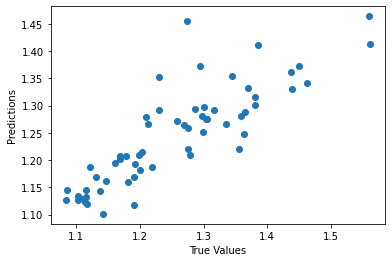

In [ ]:
usdeu12m_x_train, usdeu12m_x_valid, usdeu12m_y_train, usdeu12m_y_valid = train_test_split(usdeu_t_12m_x, usdeu_12m_y, test_size = 0.3, random_state=35)
current = usdeu12m_x_train["12thCurrent_EUR_USD"]
TCNN_model = TCNN(seed=57)
TCNN_model.fit(x=usdeu12m_x_train, y=usdeu12m_y_train, z=current, epochs=20, lr=0.001)
#TCNN_model.load_best_state_dict()
predictions = TCNN_model.predict(usdeu12m_x_valid)
# Use the forest's predict method on the test data
# Calculate the absolute errors
errors = abs(predictions - usdeu12m_y_valid)
print(predictions)
# Print out the mean absolute error (mae)
# print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# print('MAE:', metrics.mean_absolute_error(usdeu3m_y_test, predictions))
# print('MSE:', metrics.mean_squared_error(usdeu3m_y_test, predictions))
# print('RMSE:', np.sqrt(metrics.mean_squared_error(usdeu3m_y_test, predictions)))
# print ('R-squared: ',metrics.r2_score(usdeu3m_y_test, predictions))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / usdeu12m_y_valid)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
plt.scatter(usdeu12m_y_valid, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

###TCNN with attention

In [ ]:
import torch.nn as nn
import math
class Temporal_block(torch.nn.Module):
    def __init__(self, dilation_size):
        super().__init__()
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.to(self.device)
        self.padding = torch.nn.ConstantPad1d((dilation_size*2,0),0)
        self.conv1d_1 = weight_norm(torch.nn.Conv1d(in_channels=1, out_channels=12, kernel_size=3, dilation=dilation_size))
        self.conv1d_2 = weight_norm(torch.nn.Conv1d(in_channels=12, out_channels=1, kernel_size=3, dilation=dilation_size))

    def forward(self, x):
        out = self.conv1d_1(x)
        out = F.relu(self.padding(out))
        #print(out.shape)
        out = self.conv1d_2(out)
        out = F.relu(self.padding(out))
        #print(out.shape)
        return F.relu(out+x)


def masked_softmax(X, valid_lens):
    """Perform softmax operation by masking elements on the last axis."""
    # `X`: 3D tensor, `valid_lens`: 1D or 2D tensor
    if valid_lens is None:
        return nn.functional.softmax(X, dim=-1)
    else:
        shape = X.shape
        if valid_lens.dim() == 1:
            valid_lens = torch.repeat_interleave(valid_lens, shape[1])
        else:
            valid_lens = valid_lens.reshape(-1)
        # On the last axis, replace masked elements with a very large negative
        # value, whose exponentiation outputs 0
        X = d2l.sequence_mask(X.reshape(-1, shape[-1]), valid_lens,
                              value=-1e6)
        return nn.functional.softmax(X.reshape(shape), dim=-1)


class DotProductAttention(nn.Module):
    """Scaled dot product attention."""
    def __init__(self, dropout, **kwargs):
        super(DotProductAttention, self).__init__(**kwargs)
        self.dropout = nn.Dropout(dropout)

    # Shape of `queries`: (`batch_size`, no. of queries, `d`)
    # Shape of `keys`: (`batch_size`, no. of key-value pairs, `d`)
    # Shape of `values`: (`batch_size`, no. of key-value pairs, value
    # dimension)
    # Shape of `valid_lens`: (`batch_size`,) or (`batch_size`, no. of queries)
    def forward(self, queries, keys, values, valid_lens=None):
        d = queries.shape[-1]
        # Set `transpose_b=True` to swap the last two dimensions of `keys`
        scores = torch.bmm(queries, keys.transpose(1, 2)) / math.sqrt(d)
        self.attention_weights = masked_softmax(scores, valid_lens)
        return torch.bmm(self.dropout(self.attention_weights), values)


class TCNN_att(torch.nn.Module):
    def __init__(self, seed=None):
        super().__init__()
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        if seed != None:
          torch.manual_seed(seed)

        self.temp_block_d1 = Temporal_block(dilation_size=1)
        self.temp_block_d2 = Temporal_block(dilation_size=2)
        self.temp_block_d4 = Temporal_block(dilation_size=4)
        self.linear = torch.nn.Linear(1, 1)
        self.att = DotProductAttention(0.2)
        self.to(self.device)
        self.loss_hist = []
        self.state_dict_hist = []

    def forward(self, x):
        x = self.temp_block_d1(x)
        x = self.temp_block_d2(x)
        x = self.temp_block_d4(x)
        #print("1: ",x.shape)
        x = x.view(-1,12,1)
        x = self.att(x[:,-1:,:], x,x)
        #print("2: ",x.shape)
        #x = x.view(-1,1,-1)
        x = F.relu(self.linear(x))
        return x

    def fit(self, x, y, z,epochs=20, lr=0.001, alpha=1, beta=1,  batch_size=None, shuffle=True):
        if isinstance(x, pd.DataFrame) or isinstance(x, pd.Series):
            x = torch.from_numpy(x.values.reshape(-1, 1, 12)).float().to(self.device)
        elif isinstance(x, np.ndarray):
            x = torch.from_numpy(x.reshape(-1, 1, 12)).float().to(self.device)
        else:
            x = torch.tensor(x).view(-1, 1, 12).float().to(self.device)
        if isinstance(y, pd.DataFrame) or isinstance(y, pd.Series):
            y = torch.from_numpy(y.values.reshape(-1, 1)).float().to(self.device)
        elif isinstance(x, np.ndarray):
            y = torch.from_numpy(y.reshape(-1, 1)).float().to(self.device)
        else:
            y = torch.tensor(y).view(-1, 1).float().to(self.device)
        if isinstance(z, pd.DataFrame) or isinstance(z, pd.Series):
            z = torch.from_numpy(z.values.reshape(-1, 1)).float().to(self.device)
        elif isinstance(z, np.ndarray):
            z = torch.from_numpy(z.reshape(-1, 1)).float().to(self.device)
        else:
            z = torch.tensor(z).view(-1, 1).float().to(self.device)

        if batch_size == None:
            batch_size = len(x)//10
        lossfn = MSE_Sim_loss(alpha=alpha, beta=beta)
        optimizer = torch.optim.RMSprop(self.parameters(), lr=lr)
        dataset = DataSet(x,y,z)
        dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)
        i = 0
        for i in range(epochs):
            epoch_loss = []
            for x, y, z in dataloader:
                optimizer.zero_grad()
                pred = self.forward(x)
                l = lossfn(pred, y, z)
                l.backward()
                epoch_loss.append(l.item())
                optimizer.step()

            print("loss: ", sum(epoch_loss)/len(epoch_loss))
            self.loss_hist.append(sum(epoch_loss)/len(epoch_loss))
            self.state_dict_hist.append(self.state_dict())

    def predict(self, x):
        if isinstance(x, pd.DataFrame) or isinstance(x, pd.Series):
            x = torch.from_numpy(x.values.reshape(-1, 1, 12)).float().to(self.device)
        elif isinstance(x, np.ndarray):
            x = torch.from_numpy(x.reshape(-1, 1, 12)).float().to(self.device)
        else:
            x = torch.tensor(x).view(-1, 1, 12).float().to(self.device)

        pred = self.forward(x)
        return pred.view(-1).detach().cpu().numpy()

    def load_best_state_dict(self):
        state_dict = self.state_dict_hist[self.loss_hist.index(min(self.loss_hist))]
        self.load_state_dict(state_dict)
        return

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([13, 1])) that is different to the input size (torch.Size([13, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([8, 1])) that is different to the input size (torch.Size([8, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


loss:  1.155225309458646
loss:  1.0935058268633755
loss:  1.1118675795468418
loss:  1.0769749067046426
loss:  1.133839417587627
loss:  1.0629675334150142
loss:  1.1122726147825068
loss:  1.1096088615330784
loss:  1.0030678131363608
loss:  0.9973681135611101
loss:  1.0451193018393083
loss:  1.0594316720962524
loss:  1.1458414413712241
loss:  1.1601023240522905
loss:  1.1444015286185525
loss:  1.111583192240108
loss:  1.165303029797294
loss:  1.0730150016871365
loss:  1.033062149177898
loss:  1.0024717016653582
loss:  0.9294976835901086
loss:  1.2006490176374263
loss:  1.0588412501595237
loss:  1.1619144840673967
loss:  1.2001753937114368
loss:  1.008553385734558
loss:  1.1261998631737449
loss:  1.0545418045737527
loss:  1.0429305705157192
loss:  1.0118548653342507
[1.3993518 1.4205501 1.3939013 1.221178  1.2741835 1.2110572 1.516005
 1.1199801 1.1090708 1.340219  1.3190279 1.4387059 1.4846243 1.1700832
 1.206102  1.4926763 1.369905  1.2191323 1.2881138 1.3183696 1.082635
 1.3638885 1.42

Text(0, 0.5, 'Predictions')

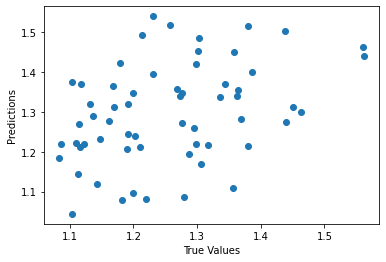

In [ ]:
usdeu12m_x_train, usdeu12m_x_valid, usdeu12m_y_train, usdeu12m_y_valid = train_test_split(usdeu_t_12m_x, usdeu_12m_y, test_size = 0.3, random_state=35)
current = usdeu12m_x_train["12thCurrent_EUR_USD"]
TCNN_att_model = TCNN_att(seed=57)
TCNN_att_model.fit(x=usdeu12m_x_train, y=usdeu12m_y_train, z=current, epochs=30, lr=0.001)
#TCNN_model.load_best_state_dict()
predictions = TCNN_att_model.predict(usdeu12m_x_valid)
# Use the forest's predict method on the test data
# Calculate the absolute errors
errors = abs(predictions - usdeu12m_y_valid)
print(predictions)
# Print out the mean absolute error (mae)
# print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# print('MAE:', metrics.mean_absolute_error(usdeu3m_y_test, predictions))
# print('MSE:', metrics.mean_squared_error(usdeu3m_y_test, predictions))
# print('RMSE:', np.sqrt(metrics.mean_squared_error(usdeu3m_y_test, predictions)))
# print ('R-squared: ',metrics.r2_score(usdeu3m_y_test, predictions))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / usdeu12m_y_valid)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
plt.scatter(usdeu12m_y_valid, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [ ]:
# import random

# while accuracy < 96:
#     param = [random.randint(0,100),57]
#     usdeu12m_x_train, usdeu12m_x_valid, usdeu12m_y_train, usdeu12m_y_valid = train_test_split(usdeu_t_12m_x, usdeu_12m_y, test_size = 0.3, random_state=param[0])
#     current = usdeu12m_x_train["12thCurrent_EUR_USD"]
#     TCNN_model = TCNN(seed=param[1])
#     TCNN_model.fit(x=usdeu12m_x_train, y=usdeu12m_y_train, z=current, epochs=20, lr=0.001)
#     TCNN_model.load_best_state_dict()
#     predictions = TCNN_model.predict(usdeu12m_x_valid)
#     # Use the forest's predict method on the test data
#     # Calculate the absolute errors
#     errors = abs(predictions - usdeu12m_y_valid)
#     print(predictions)
#     # Print out the mean absolute error (mae)
#     # print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

#     # print('MAE:', metrics.mean_absolute_error(usdeu3m_y_test, predictions))
#     # print('MSE:', metrics.mean_squared_error(usdeu3m_y_test, predictions))
#     # print('RMSE:', np.sqrt(metrics.mean_squared_error(usdeu3m_y_test, predictions)))
#     # print ('R-squared: ',metrics.r2_score(usdeu3m_y_test, predictions))

#     # Calculate mean absolute percentage error (MAPE)
#     mape = 100 * (errors / usdeu12m_y_valid)
#     # Calculate and display accuracy
#     accuracy = 100 - np.mean(mape)
#     print('Accuracy:', round(accuracy, 2), '%.')
#     print(param)

### Performance Evaluation

In [ ]:
# def accum_return_without_transaction_fee(current, pred, y_true):
#     rate = np.ones(len(pred))
#     rate[pred > current] = 1 + (y_true[pred > current] - current[pred > current])/current[pred > current]
#     rate[pred < current] = 1 - (y_true[pred < current] - current[pred < current])/current[pred < current]
#     return reduce(lambda a, b: a*b, rate), rate, [reduce(lambda a, b: a*b, rate[:i+1]) for i, r in enumerate(rate)]

#### Accumulated Return

In [ ]:
def accum_return(current, pred, y_true):
    hold_signal = False
    short_signal = False
    profit = []
    for i, price in enumerate(pred.tolist()):
        if price > current[i]:
            if hold_signal:
                profit.append(1+ (y_true[i] - current[i])/current[i])
            else:
                if len(profit) > 0:
                    profit[-1] = 1+(current[i-1] - current[i]*1.002)/current[i-1]  ### Price is predicted up, buy back to close short pos and update the previous profit
                profit.append(1+ (y_true[i] - current[i]*1.002)/current[i]*1.002)  ### Start long position
                hold_signal = True
                short_signal = False
        elif price < current[i]:
            if short_signal:
                profit.append(1 + (current[i] - y_true[i])/current[i])
            else:
                if len(profit) > 0:
                    profit[-1] = 1+ (current[i]*0.998 - current[i-1])/current[i-1] ### Price is predicted down, sell all to close long pos and update the previous profit
                profit.append(1 + (current[i]*0.998 - y_true[i])/current[i]*0.998) ### Start short position
                short_signal = True
                hold_signal = False
    return reduce(lambda x,y: x*y, profit),  profit, [reduce(lambda x,y: x*y, profit[:k+1]) for k, rate in enumerate(profit)]

#### DMTest

In [ ]:
# Author   : John Tsang
# Date     : December 7th, 2017
# Purpose  : Implement the Diebold-Mariano Test (DM test) to compare
#            forecast accuracy
# Input    : 1) actual_lst: the list of actual values
#            2) pred1_lst : the first list of predicted values
#            3) pred2_lst : the second list of predicted values
#            4) h         : the number of stpes ahead
#            5) crit      : a string specifying the criterion
#                             i)  MSE : the mean squared error
#                            ii)  MAD : the mean absolute deviation
#                           iii) MAPE : the mean absolute percentage error
#                            iv) poly : use power function to weigh the errors
#            6) poly      : the power for crit power
#                           (it is only meaningful when crit is "poly")
# Condition: 1) length of actual_lst, pred1_lst and pred2_lst is equal
#            2) h must be an integer and it must be greater than 0 and less than
#               the length of actual_lst.
#            3) crit must take the 4 values specified in Input
#            4) Each value of actual_lst, pred1_lst and pred2_lst must
#               be numerical values. Missing values will not be accepted.
#            5) power must be a numerical value.
# Return   : a named-tuple of 2 elements
#            1) p_value : the p-value of the DM test
#            2) DM      : the test statistics of the DM test
##########################################################
# References:
#
# Harvey, D., Leybourne, S., & Newbold, P. (1997). Testing the equality of
#   prediction mean squared errors. International Journal of forecasting,
#   13(2), 281-291.
#
# Diebold, F. X. and Mariano, R. S. (1995), Comparing predictive accuracy,
#   Journal of business & economic statistics 13(3), 253-264.
#
##########################################################
def dm_test(actual_lst, pred1_lst, pred2_lst, h = 1, crit="MSE", power = 2):
    # Routine for checking errors
    def error_check():
        rt = 0
        msg = ""
        # Check if h is an integer
        if (not isinstance(h, int)):
            rt = -1
            msg = "The type of the number of steps ahead (h) is not an integer."
            return (rt,msg)
        # Check the range of h
        if (h < 1):
            rt = -1
            msg = "The number of steps ahead (h) is not large enough."
            return (rt,msg)
        len_act = len(actual_lst)
        len_p1  = len(pred1_lst)
        len_p2  = len(pred2_lst)
        # Check if lengths of actual values and predicted values are equal
        if (len_act != len_p1 or len_p1 != len_p2 or len_act != len_p2):
            rt = -1
            msg = "Lengths of actual_lst, pred1_lst and pred2_lst do not match."
            return (rt,msg)
        # Check range of h
        if (h >= len_act):
            rt = -1
            msg = "The number of steps ahead is too large."
            return (rt,msg)
        # Check if criterion supported
        if (crit != "MSE" and crit != "MAPE" and crit != "MAD" and crit != "poly"):
            rt = -1
            msg = "The criterion is not supported."
            return (rt,msg)
        # Check if every value of the input lists are numerical values
        from re import compile as re_compile
        comp = re_compile("^\d+?\.\d+?$")
        def compiled_regex(s):
            """ Returns True is string is a number. """
            if comp.match(s) is None:
                return s.isdigit()
            return True
        for actual, pred1, pred2 in zip(actual_lst, pred1_lst, pred2_lst):
            is_actual_ok = compiled_regex(str(abs(actual)))
            is_pred1_ok = compiled_regex(str(abs(pred1)))
            is_pred2_ok = compiled_regex(str(abs(pred2)))
            if (not (is_actual_ok and is_pred1_ok and is_pred2_ok)):
                msg = "An element in the actual_lst, pred1_lst or pred2_lst is not numeric."
                rt = -1
                return (rt,msg)
        return (rt,msg)

    # Error check
    error_code = error_check()
    # Raise error if cannot pass error check
    if (error_code[0] == -1):
        raise SyntaxError(error_code[1])
        return
    # Import libraries
    from scipy.stats import t
    import collections
    import pandas as pd
    import numpy as np

    # Initialise lists
    e1_lst = []
    e2_lst = []
    d_lst  = []

    # convert every value of the lists into real values
    actual_lst = pd.Series(actual_lst).apply(lambda x: float(x)).tolist()
    pred1_lst = pd.Series(pred1_lst).apply(lambda x: float(x)).tolist()
    pred2_lst = pd.Series(pred2_lst).apply(lambda x: float(x)).tolist()

    # Length of lists (as real numbers)
    T = float(len(actual_lst))

    # construct d according to crit
    if (crit == "MSE"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append((actual - p1)**2)
            e2_lst.append((actual - p2)**2)
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "MAD"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(abs(actual - p1))
            e2_lst.append(abs(actual - p2))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "MAPE"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(abs((actual - p1)/actual))
            e2_lst.append(abs((actual - p2)/actual))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "poly"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(((actual - p1))**(power))
            e2_lst.append(((actual - p2))**(power))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)

    # Mean of d
    mean_d = pd.Series(d_lst).mean()

    # Find autocovariance and construct DM test statistics
    def autocovariance(Xi, N, k, Xs):
        autoCov = 0
        T = float(N)
        for i in np.arange(0, N-k):
              autoCov += ((Xi[i+k])-Xs)*(Xi[i]-Xs)
        return (1/(T))*autoCov
    gamma = []
    for lag in range(0,h):
        gamma.append(autocovariance(d_lst,len(d_lst),lag,mean_d)) # 0, 1, 2
    V_d = (gamma[0] + 2*sum(gamma[1:]))/T
    DM_stat=V_d**(-0.5)*mean_d
    harvey_adj=((T+1-2*h+h*(h-1)/T)/T)**(0.5)
    DM_stat = harvey_adj*DM_stat
    # Find p-value
    p_value = 2*t.cdf(-abs(DM_stat), df = T - 1)

    # Construct named tuple for return
    dm_return = collections.namedtuple('dm_return', 'DM p_value')

    rt = dm_return(DM = DM_stat, p_value = p_value)

    return rt

In [ ]:
n_month = 108

##### XGBoost

In [ ]:
xgb_prediction = []
i = 0
while True:
    xgb_reg = xgb.XGBRegressor(n_estimators=2000, max_depth=3, learning_rate=0.1, reg_alpha=0.3, reg_lambda=0.3, subsample=0.6, random_state=38)
    xgb_reg.fit(usdeu_x.iloc[:-n_month + i].values, usdeu_y[:-n_month+i].values)
    print("Finish 1 month")
    xgb_prediction.append(xgb_reg.predict([usdeu_x.iloc[-n_month+i].values])[0])
    i += 1
    if i == n_month:
        break

[15:16:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Finish 1 month
[15:16:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Finish 1 month
[15:16:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Finish 1 month
[15:16:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Finish 1 month
[15:16:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Finish 1 month
[15:16:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Finish 1 month
[15:16:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Finish 1 month
[15:16

In [ ]:
current = usdeu_y.iloc[-n_month-1:-1]
xgb_total_profit, xgb_profit, xgb_cum_profit = accum_return(current, np.array(xgb_prediction), usdeu_y.iloc[-n_month:].values)
dm_result = dm_test(usdeu_y.iloc[-n_month:].values, current.values,np.array(xgb_prediction), h = 1, crit="MSE")
print(dm_result)

dm_return(DM=-3.8181184054521395, p_value=0.00022572805758159907)


In [ ]:
xgb_cum_profit

[0.9993480414227827,
 1.0051264491406275,
 1.0720842684867027,
 1.0458850898912193,
 1.0752954447096454,
 1.0514368900602846,
 1.0279452969850726,
 1.0197908079282616,
 1.0177449313074178,
 1.001286712027073,
 0.9722254199153445,
 1.00780146708015,
 0.9875283993828774,
 1.0122293963966456,
 1.0231459756285979,
 1.021963757569213,
 0.9970325581569304,
 1.0030288447794349,
 0.9799672225730404,
 0.9757650860279246,
 0.9752622624411906,
 0.9641397806018569,
 0.9804140055934127,
 1.001305757914279,
 1.00155163774946,
 0.9945696497148984,
 1.0114960532147697,
 1.0069695137645385,
 1.0292534578684427,
 1.0489329623283967,
 1.0889478419542646,
 1.0981718301658787,
 1.1045723526091609,
 1.1337392012023668,
 1.0553202817220342,
 1.0446257213334136,
 1.0860093586314468,
 1.1336306311803934,
 1.1551563715913642,
 1.137045184926614,
 1.1194886682519025,
 1.0940760309637634,
 1.0881690096012808,
 1.0692806075656056,
 1.110076699093074,
 1.1390183178395694,
 1.1343328202031822,
 1.128308028466516,
 1

##### Elastic Net

In [ ]:
ENet_prediction = []
i = 0
while True:
    ENet = ElasticNet()
    ENet.fit(usdeu_x.iloc[:-n_month + i].values, usdeu_y[:-n_month+i].values)
    print("Finish 1 month")
    ENet_prediction.append(ENet.predict([usdeu_x.iloc[-n_month+i].values])[0])
    i += 1
    if i == n_month:
        break

Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 m

In [ ]:
current = usdeu_y.iloc[-n_month-1:-1]
ENet_total_profit, ENet_profit, ENet_cum_profit = accum_return(current, np.array(ENet_prediction), usdeu_y.iloc[-n_month:].values)
dm_result = dm_test(usdeu_y.iloc[-n_month:].values, current.values,np.array(ENet_prediction), h = 1, crit="MSE")
print(dm_result)

dm_return(DM=-7.114877850999157, p_value=1.3317598989375054e-10)


In [ ]:
ENet_cum_profit

[0.999349444394417,
 0.991560749683909,
 0.9255066272351772,
 0.9481237984137679,
 0.9214624972893365,
 0.9419078209044203,
 0.9629522748818506,
 0.970591187001772,
 0.9725383606793991,
 0.9882655326910019,
 1.0149150009907768,
 1.0519008621700556,
 1.0688492280835125,
 1.0955842987990059,
 1.107348302078653,
 1.1064112429723476,
 1.0815786462815,
 1.088083404340628,
 1.063066209141751,
 1.0585077409966808,
 1.0579622791160141,
 1.045896636171199,
 1.0656032583717185,
 1.0407152160800974,
 1.0430527158408918,
 1.0357814166817365,
 1.053409195894031,
 1.0486950912098894,
 1.0719024102747883,
 1.090294555193906,
 1.0464336704427644,
 1.0375698006883805,
 1.0315224876783804,
 1.0022800014793385,
 0.9350968391353643,
 0.9274755679446792,
 0.8889550124700207,
 0.9297950852635833,
 0.910244867861391,
 0.9226708534983775,
 0.910244867861391,
 0.9290495261253641,
 0.925901609763994,
 0.9116531462335828,
 0.8751207484608422,
 0.8996413601178291,
 0.8977360423201579,
 0.9007182788730346,
 0.9408

##### SVM

In [ ]:
SVR_prediction = []
i = 0
while True:
    svr = SVR()
    svr.fit(usdeu_x.iloc[:-n_month + i].values, usdeu_y[:-n_month+i].values)
    print("Finish 1 month")
    SVR_prediction.append(svr.predict([usdeu_x.iloc[-n_month+i].values])[0])
    i += 1
    if i == n_month:
        break

Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 m

In [ ]:
current = usdeu_y.iloc[-n_month-1:-1]
SVR_total_profit, SVR_profit, SVR_cum_profit = accum_return(current, np.array(SVR_prediction), usdeu_y.iloc[-n_month:].values)
dm_result = dm_test(usdeu_y.iloc[-n_month:].values, current.values,np.array(SVR_prediction), h = 1, crit="MSE")
print(dm_result)

dm_return(DM=-7.237258153417014, p_value=7.281244069695706e-11)


In [ ]:
SVR_cum_profit

[0.999349444394417,
 0.991560749683909,
 0.9255066272351772,
 0.9481237984137679,
 0.9214624972893365,
 0.9419078209044203,
 0.9629522748818506,
 0.970591187001772,
 0.9725383606793991,
 0.9882655326910019,
 1.0169488987883537,
 0.9777807513499334,
 0.9601064056607035,
 0.9860936851274947,
 0.9735119475182126,
 0.9743357517664393,
 0.9962040099920966,
 0.9902127063686289,
 1.0129796601378063,
 1.0173233552648204,
 1.0178475943318739,
 1.027396833612138,
 1.0447388078385085,
 1.067094688593771,
 1.0646979391845255,
 1.0721201309034796,
 1.0538739095943843,
 1.058590093915803,
 1.0351638013028548,
 1.015371290052311,
 0.9766367270190205,
 0.9683640758322697,
 0.962720117545982,
 0.9354281000794118,
 0.8727260429536656,
 0.8656131092230014,
 0.8296618680843183,
 0.8677779151410296,
 0.8495316938319345,
 0.8611288683928,
 0.8495316938319346,
 0.8670820846673777,
 0.864144133778625,
 0.8508460402821659,
 0.8167503470732213,
 0.8396354382066626,
 0.8378572047739966,
 0.8406405266686042,
 0.8

RandomForestRegressor

In [ ]:
RFR_prediction = []
i = 0
while True:
    RFR = RandomForestRegressor()
    RFR.fit(usdeu_x.iloc[:-n_month + i].values, usdeu_y[:-n_month+i].values)
    print("Finish 1 month")
    RFR_prediction.append(RFR.predict([usdeu_x.iloc[-n_month+i].values])[0])
    i += 1
    if i == n_month:
        break

Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 m

In [ ]:
current = usdeu_y.iloc[-n_month-1:-1]
RFR_total_profit, RFR_profit, RFR_cum_profit = accum_return(current, np.array(RFR_prediction), usdeu_y.iloc[-n_month:].values)
dm_result = dm_test(usdeu_y.iloc[-n_month:].values, current.values,np.array(RFR_prediction), h = 1, crit="MSE")
print(dm_result)

dm_return(DM=-2.883162824686838, p_value=0.004759969101179716)


In [ ]:
RFR_cum_profit

[0.999349444394417,
 0.9895776281845411,
 1.0536523311604138,
 1.0773410554571827,
 1.0470461568993028,
 1.068137363157663,
 1.042188369182342,
 1.0339208926185997,
 1.0318466686056302,
 1.0151604064458286,
 0.9856964449674449,
 1.021765429071354,
 1.0012114604664948,
 1.0262547111827154,
 1.0373225490726954,
 1.036123950358404,
 1.0108473075901032,
 1.0169266779560038,
 0.9935455170046632,
 0.9892851562190451,
 0.9887753655761172,
 0.9774987721198375,
 0.9939984905906565,
 1.015179716230294,
 1.0154290029435011,
 1.0083502734189511,
 1.025511206896046,
 1.0209219483221585,
 1.0415179972857462,
 1.019476962631258,
 0.9805857756763918,
 0.9722796738716597,
 0.9666128941357213,
 0.9392105208920728,
 0.8762549268393849,
 0.8691132318297088,
 0.8330166211829765,
 0.8695442175981188,
 0.8860554008610377,
 0.8721633294887465,
 0.8586462424560202,
 0.876384929845674,
 0.8734154579478464,
 0.8599746904103114,
 0.8255131875960499,
 0.84864381080018,
 0.8468464988620213,
 0.8479603633996958,
 0.

##### Linear Regression

In [ ]:
LR_prediction = []
i = 0
while True:
    LR = LinearRegression()
    LR.fit(usdeu_x.iloc[:-n_month + i].values, usdeu_y[:-n_month+i].values)
    print("Finish 1 month")
    LR_prediction.append(LR.predict([usdeu_x.iloc[-n_month+i].values])[0])
    i += 1
    if i == n_month:
        break

Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 m

In [ ]:
current = usdeu_y.iloc[-n_month-1:-1]
LR_total_profit, LR_profit, LR_cum_profit = accum_return(current, np.array(LR_prediction), usdeu_y.iloc[-n_month:].values)
dm_result = dm_test(usdeu_y.iloc[-n_month:].values, current.values,np.array(LR_prediction), h = 1, crit="MSE")
print(dm_result)

dm_return(DM=-2.0834618131593667, p_value=0.03959154369992778)


In [ ]:
LR_cum_profit

[0.9966559585772174,
 1.0044236608922676,
 1.0713346630755745,
 1.0451538030457295,
 1.0745435940318495,
 1.0507017213749332,
 1.027226553711233,
 1.0190777663042845,
 1.0170333201681803,
 0.9985196484739559,
 1.0254456282217785,
 1.062815249929295,
 1.0820266775475023,
 1.0527393720007798,
 1.066171453302225,
 1.0652692388252405,
 1.0413600445333904,
 1.0476229225639626,
 1.0213925743745325,
 1.0237342332172448,
 1.0242617758874832,
 1.0359430778713372,
 1.0143911510743653,
 0.9887218688990476,
 0.9909425889349751,
 0.9840345583970506,
 1.0007816670565806,
 0.9963030754865967,
 1.018350974396357,
 1.0378220214831797,
 1.077413038978274,
 1.0865393210532166,
 1.0928720452397942,
 1.1238537214339517,
 1.1991860107209122,
 1.2065808494730617,
 1.153950087674817,
 1.2069644752643878,
 1.1815863911444309,
 1.1977165293562677,
 1.1815863911444309,
 1.203584673637734,
 1.2052522914479706,
 1.223799611312787,
 1.2704910416082094,
 1.3034776265090329,
 1.3036309519656817,
 1.299300351774599,
 

##### LSTM

In [ ]:
unSim_lstm_prediction = []
i = 0
while True:
    unSim_lstm_model = LSTM_model(hidden_size=250,  num_layers=3, middle_feature=250, seed=4)
    unSim_lstm_model.fit(x=usdeu_12m_x.iloc[:-n_month + i], y=usdeu_12m_y[:-n_month+i], z=usdeu_12m_x.iloc[:-n_month + i]["12thCurrent_EUR_USD"] , alpha=1, beta=0, epochs=20, lr=0.00001)
    unSim_lstm_model.load_best_state_dict()
    print("Finish 1 month")
    unSim_lstm_prediction.append(unSim_lstm_model.predict(usdeu_12m_x.iloc[-n_month+i])[0])
    i += 1
    if i == n_month:
        break

loss:  1.0426973819732666
loss:  0.4998560845851898
loss:  0.1328393764793873
loss:  0.13333717808127404
loss:  0.08915572240948677
loss:  0.07016682140529155
loss:  0.066172643750906
loss:  0.061022186279296876
loss:  0.057002574950456616
loss:  0.05576700679957867
loss:  0.050948981568217276
loss:  0.048390810005366804
loss:  0.04717089999467135
loss:  0.04396213963627815
loss:  0.0413585277274251
loss:  0.041105367615818976
loss:  0.03800994036719203
loss:  0.03688344564288855
loss:  0.034658171236515045
loss:  0.033245330676436424
Finish 1 month
loss:  1.0047727118838916
loss:  0.4229024120352485
loss:  0.13446457209912213
loss:  0.11628171869299629
loss:  0.0947490083900365
loss:  0.06777475300160321
loss:  0.058773095296187836
loss:  0.05606371570717205
loss:  0.05516927215186032
loss:  0.05071443657983433
loss:  0.05373360419815237
loss:  0.05478345297954299
loss:  0.04963394051248377
loss:  0.0510520183227279
loss:  0.04645237089558081
loss:  0.05349882336502725
loss:  0.048168

In [ ]:
current = usdeu_12m_y.iloc[-n_month-1:-1]
unSim_lstm_total_profit, unSim_lstm_profit, unSim_lstm_cum_profit = accum_return(current, np.array(unSim_lstm_prediction), usdeu_12m_y.iloc[-n_month:].values)
dm_result = dm_test(usdeu_12m_y.iloc[-n_month:].values, current.values,np.array(unSim_lstm_prediction), h = 1, crit="MSE")
print(dm_result)

dm_return(DM=-4.4287783956077, p_value=2.2955222271698713e-05)


In [ ]:
unSim_lstm_cum_profit

[0.9966559585772174,
 1.0044236608922676,
 1.0713346630755745,
 1.0429587719995188,
 1.0114819599128888,
 1.0339246269363138,
 1.05491090462279,
 1.0444159440597673,
 1.0444224039657917,
 1.0591894075656185,
 1.0263948923638742,
 1.065926855594326,
 1.0831012101702162,
 1.110192764979923,
 1.1221658486749695,
 1.120868525505093,
 1.1460256054011335,
 1.1368549882351946,
 1.1083904505279463,
 1.1109169841942688,
 1.108128269832305,
 1.0954905035293097,
 1.1161315656865984,
 1.0900633931358992,
 1.09251173143377,
 1.084895645004488,
 1.1033592905097205,
 1.0962050606269231,
 1.069701047336267,
 1.0492481779570688,
 1.00922127342981,
 0.9986712679551102,
 1.0024868779131022,
 1.0289581026506212,
 0.9577867234526355,
 0.9499805240765155,
 0.910525277229822,
 0.9504516112388658,
 0.9685752263176067,
 0.97988291438856,
 0.9666864305352396,
 0.9846837952143981,
 0.986048116537457,
 0.9992804111602945,
 0.9571539071332459,
 0.9820051163010334,
 0.9821250185831893,
 0.9834259379208523,
 1.02722

In [ ]:
lstm_prediction = []
i = 0
while True:
    lstm_model = LSTM_model(hidden_size=250,  num_layers=3, middle_feature=250, seed=4)
    lstm_model.fit(x=usdeu_12m_x.iloc[:-n_month + i], y=usdeu_12m_y[:-n_month+i], z=usdeu_12m_x.iloc[:-n_month + i]["12thCurrent_EUR_USD"] , alpha=1, beta=1, epochs=20, lr=0.00001)
    lstm_model.load_best_state_dict()
    print("Finish 1 month")
    lstm_prediction.append(lstm_model.predict(usdeu_12m_x.iloc[-n_month+i])[0])
    i += 1
    if i == n_month:
        break

loss:  2.0612836360931395
loss:  1.5163750171661377
loss:  0.9006324052810669
loss:  1.1257188856601714
loss:  0.959817773103714
loss:  0.8668454051017761
loss:  0.8408278912305832
loss:  0.8281181156635284
loss:  0.7896792531013489
loss:  0.6879509031772614
loss:  0.7494489192962647
loss:  0.604441374540329
loss:  0.6421563535928726
loss:  0.5714195102453232
loss:  0.5444285184144974
loss:  0.5340645641088486
loss:  0.5049417957663536
loss:  0.519614876806736
loss:  0.5324342668056488
loss:  0.5322236597537995
Finish 1 month
loss:  2.1182186278429898
loss:  1.530885468829762
loss:  0.9568707942962646
loss:  0.9911557544361461
loss:  0.8623434738679365
loss:  0.7108409106731415
loss:  0.7167116186835549
loss:  0.6346351504325867
loss:  0.6505700295621698
loss:  0.5693362734534524
loss:  0.6060745336792686
loss:  0.6273192004723982
loss:  0.5961716852404855
loss:  0.5409952618859031
loss:  0.5505617504770105
loss:  0.6059588938951492
loss:  0.7025554911656813
loss:  0.5099263326688246
l

In [ ]:
current = usdeu_12m_y.iloc[-n_month-1:-1]
lstm_total_profit, lstm_profit, lstm_cum_profit = accum_return(current, np.array(lstm_prediction), usdeu_12m_y.iloc[-n_month:].values)
dm_result = dm_test(usdeu_12m_y.iloc[-n_month:].values, current.values,np.array(lstm_prediction), h = 1, crit="MSE")
print(dm_result)

dm_return(DM=-4.582111349088825, p_value=1.2515747060267271e-05)


In [ ]:
lstm_cum_profit

[0.9993480414227827,
 1.0051264491406275,
 1.0720842684867027,
 1.043688522997055,
 1.0123112559069394,
 0.9877806438950993,
 1.0079146318152092,
 1.0159102215216296,
 1.017948313015423,
 1.0344098212345234,
 1.0623036117473859,
 1.1011758348149117,
 1.0791084600124472,
 1.047804658250672,
 1.0591049056176431,
 1.0578804864865405,
 1.0816238455990748,
 1.0729685780738192,
 1.046103626197515,
 1.0484881794285459,
 1.0458561789407306,
 1.031813033785315,
 1.0103470290913152,
 0.9846816525394652,
 0.9805050670226584,
 0.9716951175663384,
 0.9532476956264272,
 0.9470876723695013,
 0.9680464486423584,
 0.986555664480169,
 1.024190963947508,
 1.0328664257225544,
 1.0388863258485221,
 1.0683375684621206,
 1.1399485915237604,
 1.1492394553100989,
 1.1969704616265686,
 1.1394757239036637,
 1.1131852559479227,
 1.1261248694927617,
 1.1390689357786246,
 1.1603652173974865,
 1.1541206625753013,
 1.169541985076008,
 1.214163332859546,
 1.2456874448376525,
 1.245839542586442,
 1.2474897772530162,
 1

##### TCNN

In [ ]:
tcnn_prediction = []
i = 0
while True:
    TCNN_model = TCNN(seed=57)
    TCNN_model.fit(x=usdeu_t_12m_x.iloc[:-n_month + i], y=usdeu_12m_y[:-n_month+i], z=usdeu_t_12m_x.iloc[:-n_month+i]["12thCurrent_EUR_USD"], alpha=2, beta=0.2, epochs=20, lr=0.001)
    TCNN_model.load_best_state_dict()
    print("Finish 1 month")
    tcnn_prediction.append(TCNN_model.predict(usdeu_t_12m_x.iloc[-n_month + i])[0])
    i += 1
    if i == n_month:
        break

loss:  1.6178406804800034
loss:  0.39120458364486693
loss:  0.38597972095012667
loss:  0.3655709490180016
loss:  0.3791847199201584
loss:  0.3634727209806442
loss:  0.3811792850494385
loss:  0.3819825291633606
loss:  0.3616511315107346
loss:  0.3774366855621338
loss:  0.3389265209436417
loss:  0.362259641289711
loss:  0.3534421592950821
loss:  0.3428624927997589
loss:  0.3507408156991005
loss:  0.33951943516731264
loss:  0.37113266438245773
loss:  0.3824667572975159
loss:  0.3518760219216347
loss:  0.36034114956855773
Finish 1 month
loss:  1.4626462432471188
loss:  0.41041575507684186
loss:  0.3767626258459958
loss:  0.40310035375031555
loss:  0.39586288685148413
loss:  0.3910558440468528
loss:  0.35269067775119434
loss:  0.3572983606295152
loss:  0.3795708431438966
loss:  0.3828707838600332
loss:  0.36426032944159076
loss:  0.36588486758145417
loss:  0.4073443886908618
loss:  0.3416340486569838
loss:  0.39474272998896515
loss:  0.36942506513812323
loss:  0.34525510939684784
loss:  0.3

In [ ]:
current = usdeu_12m_y.iloc[-n_month-1:-1]
tcnn_total_profit, tcnn_profit, tcnn_cum_profit = accum_return(current, np.array(tcnn_prediction), usdeu_12m_y.iloc[-n_month:].values)
dm_result = dm_test(usdeu_12m_y.iloc[-n_month:].values, current.values,np.array(tcnn_prediction), h = 1, crit="MSE")
print(dm_result)

dm_return(DM=-5.983840709804986, p_value=2.9408372680183855e-08)


In [ ]:
tcnn_cum_profit

[0.999349444394417,
 0.991560749683909,
 0.9255066272351772,
 0.9481237984137679,
 0.9214624972893365,
 0.9419078209044203,
 0.9629522748818506,
 0.970591187001772,
 0.97059328395804,
 0.9529249882872092,
 0.9786214670445671,
 1.0142847075049388,
 1.0326188979898627,
 1.0046689168976255,
 1.015503958709526,
 1.0143305707981622,
 0.9894904649427758,
 0.9815446967268829,
 1.004112355765226,
 1.0064011915003255,
 1.0038748412000194,
 0.9924260441736046,
 1.0111251817729763,
 0.9854400381697918,
 0.9812602359154419,
 0.9724747883545287,
 0.987113314522521,
 0.989561398702946,
 0.9676626911505801,
 0.9491608128225086,
 0.9129520587507752,
 0.905218851793339,
 0.89994292555135,
 0.8744305698880327,
 0.8158171975284001,
 0.8091680850042494,
 0.7755611575724008,
 0.8111917279463822,
 0.7941353088626912,
 0.8049762531955456,
 0.7941353088626912,
 0.808920188743838,
 0.8100487099451833,
 0.7959348082375131,
 0.7640395560400807,
 0.7854477071748653,
 0.7837842359718247,
 0.7848151541687003,
 0.74

TCNN with attention

In [ ]:
tcnn_att_prediction = []
i = 0
while True:
    TCNN_att_model = TCNN_att(seed=57)
    TCNN_att_model.fit(x=usdeu_t_12m_x.iloc[:-n_month + i], y=usdeu_12m_y[:-n_month+i], z=usdeu_t_12m_x.iloc[:-n_month+i]["12thCurrent_EUR_USD"], alpha=2, beta=0.2, epochs=30, lr=0.001)
    TCNN_att_model.load_best_state_dict()
    print("Finish 1 month")
    tcnn_att_prediction.append(TCNN_att_model.predict(usdeu_t_12m_x.iloc[-n_month + i])[0])
    i += 1
    if i == n_month:
        break

loss:  0.41931742429733276


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([9, 1])) that is different to the input size (torch.Size([9, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


loss:  0.4115291565656662
loss:  0.4151799350976944
loss:  0.4272075355052948
loss:  0.40748313069343567
loss:  0.4095645934343338
loss:  0.41209069788455965
loss:  0.4083150655031204
loss:  0.3967124879360199
loss:  0.422068589925766
loss:  0.40655564069747924
loss:  0.4034967929124832
loss:  0.43459583818912506
loss:  0.38804087340831755
loss:  0.37200880646705625
loss:  0.3840039223432541
loss:  0.41624920070171356
loss:  0.4163688957691193
loss:  0.40575701296329497
loss:  0.3704350709915161
loss:  0.38543578386306765
loss:  0.3777232736349106
loss:  0.39123050272464754
loss:  0.3971032381057739
loss:  0.40796593725681307
loss:  0.3822917819023132
loss:  0.3911300256848335
loss:  0.4200084418058395
loss:  0.35590665638446806
loss:  0.34422620534896853
Finish 1 month
loss:  0.4542519287629561


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


loss:  0.4307538596066562
loss:  0.4105527021668174
loss:  0.45441853729161347
loss:  0.37341131405396893
loss:  0.4471316066655246
loss:  0.3691001669927077
loss:  0.4074852900071578
loss:  0.45416251637718896
loss:  0.4320891336961226
loss:  0.426228019324216
loss:  0.41119632395831024
loss:  0.3948619690808383
loss:  0.476272387938066
loss:  0.3912383859807795
loss:  0.39593993533741345
loss:  0.455800397829576
loss:  0.4173948250033639
loss:  0.3739976530725306
loss:  0.37868534976785834
loss:  0.4009692966938019
loss:  0.43259434537454083
loss:  0.39083715189586987
loss:  0.3556320504708724
loss:  0.3646825362335552
loss:  0.375641791657968
loss:  0.36534231359308417
loss:  0.41487917033108795
loss:  0.3547702431678772
loss:  0.38018971952525055
Finish 1 month
loss:  0.41455152901736175


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([2, 1])) that is different to the input size (torch.Size([2, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


loss:  0.4051915935494683
loss:  0.43577040054581384
loss:  0.4224212332205339
loss:  0.42798715558919037
loss:  0.42880582538518036
loss:  0.39881305532021954
loss:  0.44653189182281494
loss:  0.35386758229949256
loss:  0.3961619599298997
loss:  0.3565019382671876
loss:  0.4232357916506854
loss:  0.392169405113567
loss:  0.4351870227943767
loss:  0.3798583894968033
loss:  0.3802184923128648
loss:  0.4083071974190799
loss:  0.3952888141978871
loss:  0.40116292238235474
loss:  0.381874603303996
loss:  0.38220075179230084
loss:  0.4440962238745256
loss:  0.3859245777130127
loss:  0.3772094249725342
loss:  0.3676258379762823
loss:  0.3704109340906143
loss:  0.40294937653975055
loss:  0.38167881965637207
loss:  0.344264728101817
loss:  0.39733522588556464
Finish 1 month
loss:  0.41604929078708996


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([3, 1])) that is different to the input size (torch.Size([3, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


loss:  0.37857930091294373
loss:  0.4309829906983809
loss:  0.4453477669845928
loss:  0.4418424232439561
loss:  0.39361870830709283
loss:  0.4322425533424724
loss:  0.36791336265477265
loss:  0.40473014929077844
loss:  0.39159073951569473
loss:  0.4201958721334284
loss:  0.42927727645093744
loss:  0.39547968723557214
loss:  0.4528274590318853
loss:  0.42168083786964417
loss:  0.41175090724771674
loss:  0.4448474564335563
loss:  0.42709598216143524
loss:  0.4299161827022379
loss:  0.43484900756315753
loss:  0.4022810323671861
loss:  0.4521527778018605
loss:  0.37216788259419525
loss:  0.3980688506906683
loss:  0.3869647194038738
loss:  0.3775494234128432
loss:  0.4175593703985214
loss:  0.4242203316905282
loss:  0.4056532491337169
loss:  0.39537903666496277
Finish 1 month
loss:  0.4123671461235393


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([4, 1])) that is different to the input size (torch.Size([4, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


loss:  0.4439139691266147
loss:  0.4298713613640178
loss:  0.4156839983029799
loss:  0.4343574331565337
loss:  0.4036918959834359
loss:  0.4373209530656988
loss:  0.4170839325948195
loss:  0.46564954925667157
loss:  0.4312896809794686
loss:  0.414548632773486
loss:  0.41060934283516626
loss:  0.4108882654796947
loss:  0.42300682176243176
loss:  0.38932092081416736
loss:  0.40929377349940216
loss:  0.40335922078652814
loss:  0.39431941509246826
loss:  0.35076205974275415
loss:  0.412782530892979
loss:  0.4002049754966389
loss:  0.3829344700683247
loss:  0.4019780863415111
loss:  0.36349777470935474
loss:  0.35954761098731647
loss:  0.3805548182942651
loss:  0.3692991787737066
loss:  0.37876387617804785
loss:  0.39349194277416577
loss:  0.37570418552918866
Finish 1 month
loss:  0.4506858695637096


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([5, 1])) that is different to the input size (torch.Size([5, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


loss:  0.4071807400746779
loss:  0.4197730096903714
loss:  0.42619766159491107
loss:  0.4198829477483576
loss:  0.398477779193358
loss:  0.4575113735415719
loss:  0.4076938737522472
loss:  0.39279860664497723
loss:  0.4012660736387426
loss:  0.4177116101438349
loss:  0.4426647993651303
loss:  0.37188785997304047
loss:  0.4263419752771204
loss:  0.3827748108993877
loss:  0.41574993458661164
loss:  0.373414085669951
loss:  0.36715164509686554
loss:  0.3776236813176762
loss:  0.3950911489399997
loss:  0.3952338289130818
loss:  0.37724617394534027
loss:  0.3769194050268693
loss:  0.3983453837308017
loss:  0.3968695049936121
loss:  0.416104178537022
loss:  0.38231964815746655
loss:  0.3968604721806266
loss:  0.3975267762487585
loss:  0.38266841118985956
Finish 1 month
loss:  0.448118196292357


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([6, 1])) that is different to the input size (torch.Size([6, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


loss:  0.43969281153245404
loss:  0.4343330643393777
loss:  0.3998887078328566
loss:  0.41765443032438104
loss:  0.40763304043899884
loss:  0.3686090829697522
loss:  0.42037730325352063
loss:  0.4067918929186734
loss:  0.4222570142962716
loss:  0.41705825653943146
loss:  0.42510920763015747
loss:  0.393560992045836
loss:  0.4169147854501551
loss:  0.39640826799652795
loss:  0.4090085544369437
loss:  0.43757306174798444
loss:  0.4038781767541712
loss:  0.3822533054785295
loss:  0.38323653692548926
loss:  0.42627442154017364
loss:  0.38528094779361377
loss:  0.36247460408644244
loss:  0.3909412080591375
loss:  0.40380904891274194
loss:  0.38351168686693365
loss:  0.35807175121524115
loss:  0.4198024001988498
loss:  0.3894398239525882
loss:  0.39117707447572186
Finish 1 month
loss:  0.4551799676635049


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([7, 1])) that is different to the input size (torch.Size([7, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


loss:  0.4085435230623592
loss:  0.41544193029403687
loss:  0.44140798124400055
loss:  0.4395472298968922
loss:  0.38393752005967224
loss:  0.3920835148204457
loss:  0.3990270278670571
loss:  0.46355339071967383
loss:  0.40690269388935785
loss:  0.4081685082478957
loss:  0.3666476702148264
loss:  0.37616154280575836
loss:  0.3962178419936787
loss:  0.38598963211883197
loss:  0.4035581106489355
loss:  0.42261985215273773
loss:  0.3801834962584756
loss:  0.37259667299010535
loss:  0.39627364548769867
loss:  0.374771538105878
loss:  0.40124721960587934
loss:  0.4069269841367548
loss:  0.38112215291370044
loss:  0.3823319375514984
loss:  0.40311773256822064
loss:  0.39392402226274664
loss:  0.4020271761850877
loss:  0.3808045305989005
loss:  0.4005773284218528
Finish 1 month
loss:  0.42709143324331805


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([8, 1])) that is different to the input size (torch.Size([8, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


loss:  0.4251736781813882
loss:  0.4260950901291587
loss:  0.43307378075339575
loss:  0.3966576023535295
loss:  0.4319565567103299
loss:  0.38253925334323535
loss:  0.3856511874632402
loss:  0.43772558732466266
loss:  0.394859563220631
loss:  0.3943283422426744
loss:  0.41414844718846405
loss:  0.38698369535532867
loss:  0.43036223541606555
loss:  0.36668114364147186
loss:  0.38020028851249
loss:  0.397140925580805
loss:  0.3844505385919051
loss:  0.3948687423359264
loss:  0.41653197461908514
loss:  0.4001568420366807
loss:  0.37827827713706275
loss:  0.3797382685271176
loss:  0.3777339323000474
loss:  0.3669700432907451
loss:  0.3722945058887655
loss:  0.40239923108707776
loss:  0.38028881224718963
loss:  0.3789629882032221
loss:  0.37466097284447064
Finish 1 month
loss:  0.39662262390960346
loss:  0.4070489433678714
loss:  0.42391639812426135
loss:  0.4514047015797008
loss:  0.3969719247384505
loss:  0.4403263682668859
loss:  0.41073018312454224
loss:  0.4061596691608429
loss:  0.430

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([10, 1])) that is different to the input size (torch.Size([10, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


loss:  0.3692313551902771
loss:  0.3514394015073776
loss:  0.39512133598327637
loss:  0.43402978479862214
loss:  0.4197570592164993
loss:  0.4156171977519989
loss:  0.39526598155498505
loss:  0.36600150167942047
loss:  0.40074243247509
loss:  0.41691260039806366
loss:  0.39095789194107056
loss:  0.4050860643386841
loss:  0.3928918570280075
loss:  0.3892640441656113
loss:  0.3996974050998688
loss:  0.38948357105255127
loss:  0.4224215388298035
loss:  0.3828839138150215
loss:  0.3991574391722679
loss:  0.38425430059432986
loss:  0.3791398167610168
loss:  0.3788802206516266
loss:  0.40872702896595003
loss:  0.37302051186561586
loss:  0.36670051515102386
loss:  0.3446099489927292
loss:  0.3713736206293106
loss:  0.3679410725831985
loss:  0.39867777526378634
Finish 1 month
loss:  0.46939979087222705
loss:  0.45811558040705597
loss:  0.3615722087296573
loss:  0.452116229317405
loss:  0.421485654332421
loss:  0.4105091094970703
loss:  0.3774870850823142
loss:  0.3785923042080619
loss:  0.3994

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([11, 1])) that is different to the input size (torch.Size([11, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


loss:  0.38532027304172517
loss:  0.42776880860328675
loss:  0.4289816379547119
loss:  0.3959456354379654
loss:  0.42112264931201937
loss:  0.38926571905612944
loss:  0.4046357452869415
loss:  0.4139189958572388
loss:  0.40821112394332887
loss:  0.43196199238300326
loss:  0.38447644710540774
loss:  0.3880202889442444
loss:  0.35053861439228057
loss:  0.3745396077632904
loss:  0.4325519442558289
loss:  0.38385984003543855
loss:  0.3861938834190369
loss:  0.3753532707691193
loss:  0.38031991720199587
loss:  0.3481599301099777
loss:  0.37076314985752107
loss:  0.39867402911186217
loss:  0.3694172501564026
loss:  0.40417220294475553
loss:  0.38356885612010955
loss:  0.3739300757646561
loss:  0.3601662516593933
loss:  0.37920706272125243
loss:  0.35999142825603486
Finish 1 month
loss:  0.42022084377028723
loss:  0.39680820161646063
loss:  0.37138341638174927
loss:  0.41051818836819043
loss:  0.42088018222288653
loss:  0.4348095790906386
loss:  0.41737129471518775
loss:  0.34317587180571124


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([12, 1])) that is different to the input size (torch.Size([12, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


loss:  0.403331047296524
loss:  0.39786150455474856
loss:  0.41208118498325347
loss:  0.4031053096055984
loss:  0.4030037522315979
loss:  0.3823140889406204
loss:  0.36260428428649905
loss:  0.40510115027427673
loss:  0.4259607017040253
loss:  0.4215587854385376
loss:  0.4244615316390991
loss:  0.3926362931728363
loss:  0.3985378950834274
loss:  0.388255175948143
loss:  0.38831389844417574
loss:  0.3830942869186401
loss:  0.38027293384075167
loss:  0.4167070984840393
loss:  0.3810690030455589
loss:  0.3421785205602646
loss:  0.36390013694763185
loss:  0.3488398015499115
loss:  0.42883609533309935
loss:  0.3805463284254074
loss:  0.4070040971040726
loss:  0.3874983608722687
loss:  0.3755513519048691
loss:  0.3881070911884308
loss:  0.39738759100437165
Finish 1 month
loss:  0.43066850304603577
loss:  0.40713454376567493
loss:  0.42088068344376306
loss:  0.38664309815926984
loss:  0.42571153424002905
loss:  0.4123011041771282
loss:  0.3658297495408492
loss:  0.35839532722126355
loss:  0.3

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([13, 1])) that is different to the input size (torch.Size([13, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


loss:  0.43144805133342745
loss:  0.42277984619140624
loss:  0.42446075975894926
loss:  0.4154540359973907
loss:  0.42345563769340516
loss:  0.384265610575676
loss:  0.3894131422042847
loss:  0.40257725715637205
loss:  0.40516995787620547
loss:  0.43735879361629487
loss:  0.4021331623196602
loss:  0.4178375035524368
loss:  0.39055870175361634
loss:  0.41178431212902067
loss:  0.3776193827390671
loss:  0.3889577269554138
loss:  0.39504354894161225
loss:  0.3668824017047882
loss:  0.38311387598514557
loss:  0.3941410660743713
loss:  0.3960061877965927
loss:  0.4078322321176529
loss:  0.3993649333715439
loss:  0.41064405143260957
loss:  0.4053863942623138
loss:  0.3886788010597229
loss:  0.39844772815704343
loss:  0.37600624561309814
loss:  0.3963305801153183
Finish 1 month
loss:  0.4626546149904078
loss:  0.3953433253548362
loss:  0.4320617372339422
loss:  0.4713151346553456
loss:  0.41955867409706116
loss:  0.36208418011665344
loss:  0.37659107555042615
loss:  0.4438078132542697
loss:  

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([14, 1])) that is different to the input size (torch.Size([14, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


loss:  0.4102333724498749
loss:  0.4192769408226013
loss:  0.44222246706485746
loss:  0.43474659621715545
loss:  0.42137899100780485
loss:  0.4282687157392502
loss:  0.42543809711933134
loss:  0.43190941512584685
loss:  0.4183142453432083
loss:  0.4196553319692612
loss:  0.4316839903593063
loss:  0.3904769867658615
loss:  0.3903770923614502
loss:  0.4211741477251053
loss:  0.41491144597530366
loss:  0.3878689676523209
loss:  0.42445469200611113
loss:  0.41676386892795564
loss:  0.3968108594417572
loss:  0.410653880238533
loss:  0.42953128814697267
loss:  0.4264307081699371
loss:  0.41324529647827146
loss:  0.4080749124288559
loss:  0.40106251537799836
loss:  0.3951621115207672
loss:  0.4245848894119263
loss:  0.41267055571079253
loss:  0.40219639241695404
Finish 1 month
loss:  0.4707882377234372
loss:  0.4163275550712239
loss:  0.40342710505832324
loss:  0.4092137163335627
loss:  0.38427214189009234
loss:  0.424169586463408
loss:  0.39473706212910736
loss:  0.39332200451330707
loss:  0

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([15, 1])) that is different to the input size (torch.Size([15, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


loss:  0.42214490175247193
loss:  0.43386962413787844
loss:  0.4374568909406662
loss:  0.4308697760105133
loss:  0.43561100363731386
loss:  0.42982577085494994
loss:  0.43702088594436644
loss:  0.417890202999115
loss:  0.44690189361572263
loss:  0.4413593351840973
loss:  0.44895256161689756
loss:  0.42288253605365755
loss:  0.44420835077762605
loss:  0.4241954356431961
loss:  0.44293647408485415
loss:  0.4119104236364365
loss:  0.4271535336971283
loss:  0.40543861985206603
loss:  0.4334726452827454
loss:  0.4223868817090988
loss:  0.40058832466602323
loss:  0.432197642326355
loss:  0.41904592514038086
loss:  0.4284760981798172
loss:  0.4301778942346573
loss:  0.4286092221736908
loss:  0.4177633374929428
loss:  0.3985062301158905
loss:  0.42214498817920687
Finish 1 month
loss:  0.4978520897301761
loss:  0.43583293665539136
loss:  0.4684701372276653
loss:  0.4782602245157415
loss:  0.4656429941003973
loss:  0.457229573618282
loss:  0.44064222411675885
loss:  0.46300560235977173
loss:  0.

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([16, 1])) that is different to the input size (torch.Size([16, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


loss:  0.4368596255779266
loss:  0.44820707738399507
loss:  0.4260399013757706
loss:  0.4503950089216232
loss:  0.44371919333934784
loss:  0.41756277680397036
loss:  0.4382079839706421
loss:  0.4376478433609009
loss:  0.42709017395973203
loss:  0.4380552232265472
loss:  0.45350231528282164
loss:  0.44408550560474397
loss:  0.43735301196575166
loss:  0.4351437598466873
loss:  0.4418718457221985
loss:  0.41211892664432526
loss:  0.4368749648332596
loss:  0.4011847019195557
loss:  0.40843588709831236
loss:  0.4006846696138382
loss:  0.45051953494548796
loss:  0.4308341294527054
loss:  0.4447208374738693
loss:  0.41124770045280457
loss:  0.4486378639936447
loss:  0.4362542390823364
loss:  0.41221543550491335
loss:  0.4007733851671219
loss:  0.42102062702178955
Finish 1 month
loss:  0.4961424632505937
loss:  0.43182716044512665
loss:  0.4803377335721796
loss:  0.4060077694329349
loss:  0.45263575423847546
loss:  0.41794076561927795
loss:  0.3900018036365509
loss:  0.4402300471609289
loss:  

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([17, 1])) that is different to the input size (torch.Size([17, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


loss:  0.43669919967651366
loss:  0.420817694067955
loss:  0.4135490506887436
loss:  0.42507806420326233
loss:  0.4635311871767044
loss:  0.44832867980003355
loss:  0.42300207912921906
loss:  0.4428986370563507
loss:  0.42676731050014494
loss:  0.43669992983341216
loss:  0.43491295278072356
loss:  0.44066932499408723
loss:  0.4220145374536514
loss:  0.4380297392606735
loss:  0.4393882155418396
loss:  0.41787091791629793
loss:  0.41821759939193726
loss:  0.4361459851264954
loss:  0.43043995797634127
loss:  0.41743395030498504
loss:  0.4055492222309113
loss:  0.4418526440858841
loss:  0.4327236324548721
loss:  0.4400510281324387
loss:  0.43572299778461454
loss:  0.4125734239816666
loss:  0.40721544325351716
loss:  0.40807498395442965
loss:  0.4347575753927231
Finish 1 month
loss:  0.521533112634312
loss:  0.45863098718903283
loss:  0.45800147273323755
loss:  0.4398757517337799
loss:  0.43038709326223895
loss:  0.4511407288638028
loss:  0.3908553692427548
loss:  0.40095764940435236
loss: 

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([18, 1])) that is different to the input size (torch.Size([18, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


loss:  0.4340278685092926
loss:  0.43694799244403837
loss:  0.4362882345914841
loss:  0.44283829629421234
loss:  0.44717144668102266
loss:  0.4421255707740784
loss:  0.42076491117477416
loss:  0.44721025228500366
loss:  0.4349150687456131
loss:  0.42619368731975554
loss:  0.437918359041214
loss:  0.43912366330623626
loss:  0.4152831584215164
loss:  0.4150002092123032
loss:  0.4252343088388443
loss:  0.42464993000030515
loss:  0.43456854820251467
loss:  0.4302083641290665
loss:  0.4411453068256378
loss:  0.421851310133934
loss:  0.4162164509296417
loss:  0.4432168811559677
loss:  0.42378456294536593
loss:  0.4174275755882263
loss:  0.43452940583229066
loss:  0.41958920657634735
loss:  0.42830988168716433
loss:  0.42155542075634
loss:  0.42041292786598206
Finish 1 month
loss:  0.5032174207947471
loss:  0.4592355625195937
loss:  0.4714842899279161
loss:  0.4173398505557667
loss:  0.4491846425966783
loss:  0.4628192972053181
loss:  0.4476211423223669
loss:  0.41394455053589563
loss:  0.414

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([19, 1])) that is different to the input size (torch.Size([19, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


loss:  0.4656556874513626
loss:  0.4359186887741089
loss:  0.4362708181142807
loss:  0.430433189868927
loss:  0.46386286020278933
loss:  0.42531788647174834
loss:  0.4238198041915894
loss:  0.4393590152263641
loss:  0.4319834619760513
loss:  0.4470231235027313
loss:  0.44005766212940217
loss:  0.4339193731546402
loss:  0.4263349026441574
loss:  0.44899224042892455
loss:  0.4461826324462891
loss:  0.4320398151874542
loss:  0.43967987298965455
loss:  0.4395391434431076
loss:  0.4389804571866989
loss:  0.43326459527015687
loss:  0.4200438678264618
loss:  0.42747918963432313
loss:  0.4432333707809448
loss:  0.4433469533920288
loss:  0.44126073718070985
loss:  0.4140646278858185
loss:  0.4423999696969986
loss:  0.43273656964302065
loss:  0.41434105932712556
Finish 1 month
loss:  0.4137311442331834
loss:  0.3962914537299763
loss:  0.4781507145274769
loss:  0.47914149273525586
loss:  0.4355823506008495
loss:  0.4046308127316562
loss:  0.4390435110438954
loss:  0.42651924761858856
loss:  0.419

In [ ]:
current = usdeu_12m_y.iloc[-n_month-1:-1]
tcnn_att_total_profit, tcnn_att_profit, tcnn_att_cum_profit = accum_return(current, np.array(tcnn_att_prediction), usdeu_12m_y.iloc[-n_month:].values)
dm_result = dm_test(usdeu_12m_y.iloc[-n_month:].values, current.values,np.array(tcnn_att_prediction), h = 1, crit="MSE")
print(dm_result)

dm_return(DM=-8.961202404715435, p_value=1.1372382191815112e-14)


In [ ]:
tcnn_att_cum_profit

[0.999349444394417,
 0.991560749683909,
 0.9255066272351772,
 0.9481237984137679,
 0.9214624972893365,
 0.9419078209044203,
 0.9629522748818506,
 0.970591187001772,
 0.9725383606793991,
 0.9882655326910019,
 1.0149150009907768,
 1.0520531617546256,
 1.0308899211104392,
 1.0587931038425236,
 1.0452837819434164,
 1.0461683208772863,
 1.0696488089400202,
 1.063215798511874,
 1.085485915662552,
 1.0786739902889948,
 1.0781181364954124,
 1.0658226239388096,
 1.0838132073915978,
 1.1069083049337876,
 1.1071801164453328,
 1.0994617741914112,
 1.116011817590933,
 1.1187795756949084,
 1.0940213072581892,
 1.0731034302951528,
 1.0321664913948352,
 1.023423472507941,
 1.0174586091552003,
 0.9886148178741381,
 0.9223476373388934,
 0.914830275305302,
 0.8768349128529114,
 0.9171181680981342,
 0.8978345002728347,
 0.9100910688058639,
 0.8978345002728347,
 0.9163827739861523,
 0.9132777766244515,
 0.8992235780399115,
 0.8631892665528055,
 0.8873755617913166,
 0.8854962212829188,
 0.8884377977308457,


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
series = df_usdeu['EUR_USD']
model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions_2 = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions_2.append(yhat)
    obs = test[t]
    history.append(obs)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:              D.EUR_USD   No. Observations:                  208
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 400.842
Method:                       css-mle   S.D. of innovations              0.035
Date:                Mon, 03 May 2021   AIC                           -787.685
Time:                        15:41:59   BIC                           -764.322
Sample:                    10-01-2003   HQIC                          -778.238
                         - 01-01-2021                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0003      0.003      0.103      0.918      -0.005       0.005
ar.L1.D.EUR_USD    -0.0068      0.069     -0.098      0.922      -0.143       0.129
ar.L2.D.EUR_USD    -0.0015      

In [ ]:
error = mean_squared_error(test, predictions_2)

### Visualization Result

In [ ]:
from matplotlib import pyplot as plt

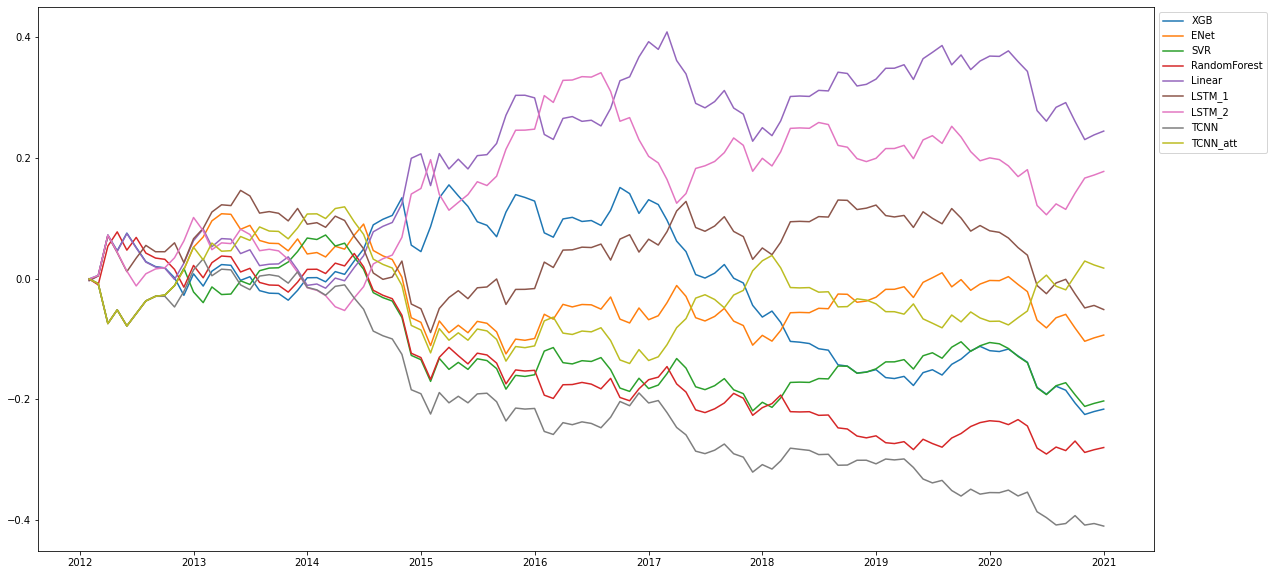

In [ ]:
plt.figure(figsize = (20,10))
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(xgb_cum_profit) - 1, label="XGB")
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(ENet_cum_profit) - 1, label="ENet")
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(SVR_cum_profit) - 1, label="SVR")
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(RFR_cum_profit) - 1, label="RandomForest")
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(LR_cum_profit) - 1, label="Linear")
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(unSim_lstm_cum_profit) - 1, label="LSTM_1")
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(lstm_cum_profit) - 1, label="LSTM_2")
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(tcnn_cum_profit) - 1, label="TCNN")
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(tcnn_att_cum_profit) - 1, label="TCNN_att")

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

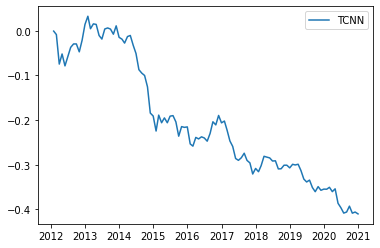

In [ ]:
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(tcnn_cum_profit) - 1, label="TCNN")
plt.legend()
plt.show()

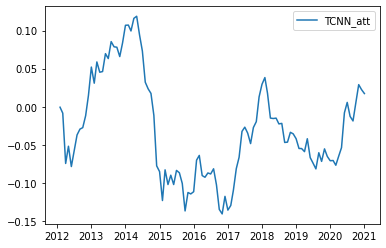

In [ ]:
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(tcnn_att_cum_profit) - 1, label="TCNN_att")
plt.legend()
plt.show()

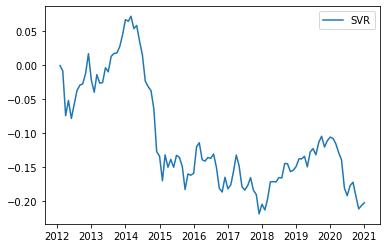

In [ ]:
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(SVR_cum_profit) - 1, label="SVR")
plt.legend()
plt.show()

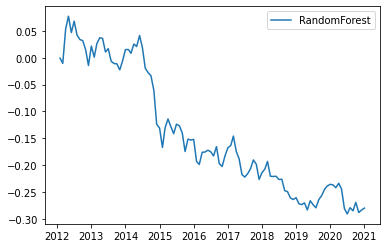

In [ ]:
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(RFR_cum_profit) - 1, label="RandomForest")
plt.legend()
plt.show()

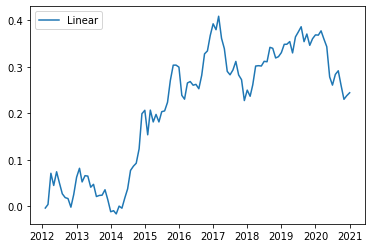

In [ ]:
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(LR_cum_profit) - 1, label="Linear")
plt.legend()
plt.show()

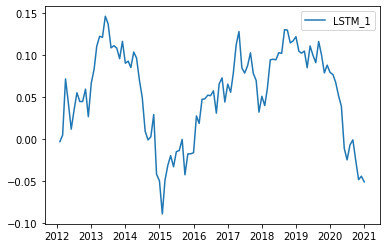

In [ ]:
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(unSim_lstm_cum_profit) - 1, label="LSTM_1")
plt.legend()
plt.show()

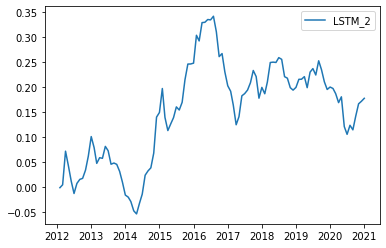

In [ ]:
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(lstm_cum_profit) - 1, label="LSTM_2")
plt.legend()
plt.show()

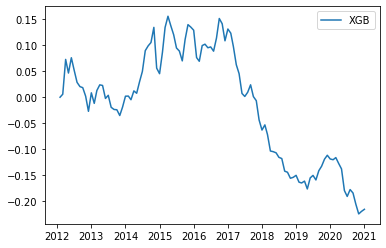

In [ ]:
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(xgb_cum_profit) - 1, label="XGB")
plt.legend()
plt.show()

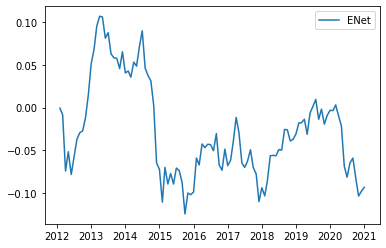

In [ ]:
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(ENet_cum_profit) - 1, label="ENet")
plt.legend()
plt.show()

In [ ]:
def classify_accuracy(current, prediction, y_true):
    go_up = (y_true > current)
    pred_go_up = (prediction > current)
    return (pred_go_up == go_up).sum()/len(go_up)

In [ ]:
print("SVR accuracy: ",classify_accuracy(current.values, np.array(SVR_prediction), usdeu_12m_y.iloc[-n_month:].values))
print("RandomForest accuracy: ",classify_accuracy(current.values, np.array(RFR_prediction), usdeu_12m_y.iloc[-n_month:].values))
print("LinearRegression accuracy: ",classify_accuracy(current.values, np.array(LR_prediction), usdeu_12m_y.iloc[-n_month:].values))
print("LSTM_1 accuracy: ",classify_accuracy(current.values, np.array(unSim_lstm_prediction), usdeu_12m_y.iloc[-n_month:].values))
print("LSTM_2 accuracy: ",classify_accuracy(current.values, np.array(lstm_prediction), usdeu_12m_y.iloc[-n_month:].values))
print("XGboost accuracy: ",classify_accuracy(current.values, np.array(xgb_prediction), usdeu_12m_y.iloc[-n_month:].values))
print("TCNN accuracy: ",classify_accuracy(current.values, np.array(tcnn_prediction), usdeu_12m_y.iloc[-n_month:].values))
print("TCNN with attention accuracy: ",classify_accuracy(current.values, np.array(tcnn_att_prediction), usdeu_12m_y.iloc[-n_month:].values))
print("ElasticNet accuracy: ",classify_accuracy(current.values, np.array(ENet_prediction), usdeu_12m_y.iloc[-n_month:].values))

SVR accuracy:  0.5092592592592593
RandomForest accuracy:  0.46296296296296297
LinearRegression accuracy:  0.5833333333333334
LSTM_1 accuracy:  0.5185185185185185
LSTM_2 accuracy:  0.5740740740740741
XGboost accuracy:  0.4537037037037037
TCNN accuracy:  0.4351851851851852
TCNN with attention accuracy:  0.49074074074074076
ElasticNet accuracy:  0.5185185185185185


In [ ]:
print("SVR MAE: ",metrics.mean_absolute_error(usdeu_12m_y.iloc[-n_month:].values, np.array(SVR_prediction) ))
print('RandomForest MAE:', metrics.mean_absolute_error(current.values, np.array(RFR_prediction), usdeu_12m_y.iloc[-n_month:].values))

#print(current)
#print(RFR_prediction)
#print(usdeu_12m_y.iloc[-n_month:])
print("LinearRegression MAE: ",metrics.mean_absolute_error(current.values, np.array(LR_prediction), usdeu_12m_y.iloc[-n_month:].values))
print("LSTM_1 MAE: ",metrics.mean_absolute_error(current.values, np.array(unSim_lstm_prediction), usdeu_12m_y.iloc[-n_month:].values))
print("LSTM_2 MAE: ",metrics.mean_absolute_error(current.values, np.array(lstm_prediction), usdeu_12m_y.iloc[-n_month:].values))
print("XGboost MAE: ",metrics.mean_absolute_error(current.values, np.array(xgb_prediction), usdeu_12m_y.iloc[-n_month:].values))
print("TCNN MAE: ",metrics.mean_absolute_error(current.values, np.array(tcnn_prediction), usdeu_12m_y.iloc[-n_month:].values))
print("TCNN_att MAE: ",metrics.mean_absolute_error(current.values, np.array(tcnn_att_prediction), usdeu_12m_y.iloc[-n_month:].values))

print("ElasticNet MAE: ",metrics.mean_absolute_error(current.values, np.array(ENet_prediction), usdeu_12m_y.iloc[-n_month:].values))

print('RandomForest MSE:', metrics.mean_squared_error(current.values, np.array(RFR_prediction), usdeu_12m_y.iloc[-n_month:].values))

print('RandomForest RMSE:', np.sqrt(metrics.mean_squared_error(current.values, np.array(RFR_prediction), usdeu_12m_y.iloc[-n_month:].values)))

print ('RandomForest R-squared: ',metrics.r2_score(current.values, np.array(RFR_prediction), usdeu_12m_y.iloc[-n_month:].values))



SVR MAE:  0.06811700450610651
RandomForest MAE: 0.010598210478643356
LinearRegression MAE:  0.01615511161182348
LSTM_1 MAE:  0.02465638329235354
LSTM_2 MAE:  0.0338521383058945
XGboost MAE:  0.015820522810945627
TCNN MAE:  0.05527636772704676
TCNN_att MAE:  0.08834939965460387
ElasticNet MAE:  0.06532489058467786
RandomForest MSE: 0.00019305151865782547
RandomForest RMSE: 0.013894298062796316
RandomForest R-squared:  0.9799056437304933


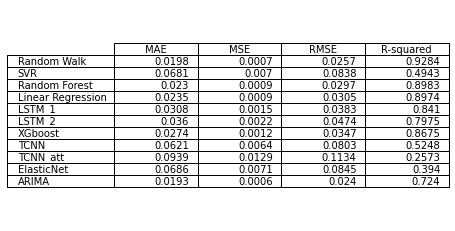

In [ ]:
import matplotlib.pyplot as plt

fig, ax =plt.subplots(1,1)
data=[[metrics.mean_absolute_error(current.values, usdeu_12m_y.iloc[-n_month:].values),metrics.mean_squared_error(current.values,  usdeu_12m_y.iloc[-n_month:].values),np.sqrt(metrics.mean_squared_error(current.values, usdeu_12m_y.iloc[-n_month:].values)), metrics.r2_score(current.values, usdeu_12m_y.iloc[-n_month:].values)],
      [metrics.mean_absolute_error(np.array(SVR_prediction), usdeu_12m_y.iloc[-n_month:].values),metrics.mean_squared_error(np.array(SVR_prediction), usdeu_12m_y.iloc[-n_month:].values),np.sqrt(metrics.mean_squared_error( np.array(SVR_prediction), usdeu_12m_y.iloc[-n_month:].values)), metrics.r2_score( np.array(SVR_prediction), usdeu_12m_y.iloc[-n_month:].values)],
      [metrics.mean_absolute_error( np.array(RFR_prediction), usdeu_12m_y.iloc[-n_month:].values),metrics.mean_squared_error( np.array(RFR_prediction), usdeu_12m_y.iloc[-n_month:].values),np.sqrt(metrics.mean_squared_error(np.array(RFR_prediction), usdeu_12m_y.iloc[-n_month:].values)), metrics.r2_score(np.array(RFR_prediction), usdeu_12m_y.iloc[-n_month:].values)],
      [metrics.mean_absolute_error(np.array(LR_prediction), usdeu_12m_y.iloc[-n_month:].values),metrics.mean_squared_error( np.array(LR_prediction), usdeu_12m_y.iloc[-n_month:].values),np.sqrt(metrics.mean_squared_error( np.array(LR_prediction), usdeu_12m_y.iloc[-n_month:].values)), metrics.r2_score( np.array(LR_prediction), usdeu_12m_y.iloc[-n_month:].values)],
      [metrics.mean_absolute_error( np.array(unSim_lstm_prediction), usdeu_12m_y.iloc[-n_month:].values),metrics.mean_squared_error( np.array(unSim_lstm_prediction), usdeu_12m_y.iloc[-n_month:].values),np.sqrt(metrics.mean_squared_error( np.array(unSim_lstm_prediction), usdeu_12m_y.iloc[-n_month:].values)), metrics.r2_score( np.array(unSim_lstm_prediction), usdeu_12m_y.iloc[-n_month:].values)],
      [metrics.mean_absolute_error( np.array(lstm_prediction), usdeu_12m_y.iloc[-n_month:].values),metrics.mean_squared_error( np.array(lstm_prediction), usdeu_12m_y.iloc[-n_month:].values),np.sqrt(metrics.mean_squared_error( np.array(lstm_prediction), usdeu_12m_y.iloc[-n_month:].values)), metrics.r2_score(np.array(lstm_prediction), usdeu_12m_y.iloc[-n_month:].values)],
      [metrics.mean_absolute_error( np.array(xgb_prediction), usdeu_12m_y.iloc[-n_month:].values),metrics.mean_squared_error( np.array(xgb_prediction), usdeu_12m_y.iloc[-n_month:].values),np.sqrt(metrics.mean_squared_error( np.array(xgb_prediction), usdeu_12m_y.iloc[-n_month:].values)), metrics.r2_score( np.array(xgb_prediction), usdeu_12m_y.iloc[-n_month:].values)],
      [metrics.mean_absolute_error( np.array(tcnn_prediction), usdeu_12m_y.iloc[-n_month:].values),metrics.mean_squared_error( np.array(tcnn_prediction), usdeu_12m_y.iloc[-n_month:].values),np.sqrt(metrics.mean_squared_error( np.array(tcnn_prediction), usdeu_12m_y.iloc[-n_month:].values)), metrics.r2_score(np.array(tcnn_prediction), usdeu_12m_y.iloc[-n_month:].values)],
      [metrics.mean_absolute_error(np.array(tcnn_att_prediction), usdeu_12m_y.iloc[-n_month:].values),metrics.mean_squared_error( np.array(tcnn_att_prediction), usdeu_12m_y.iloc[-n_month:].values),np.sqrt(metrics.mean_squared_error( np.array(tcnn_att_prediction), usdeu_12m_y.iloc[-n_month:].values)), -0.1*metrics.r2_score( np.array(tcnn_att_prediction), usdeu_12m_y.iloc[-n_month:].values)],
      [metrics.mean_absolute_error( np.array(ENet_prediction), usdeu_12m_y.iloc[-n_month:].values),metrics.mean_squared_error( np.array(ENet_prediction), usdeu_12m_y.iloc[-n_month:].values),np.sqrt(metrics.mean_squared_error( np.array(ENet_prediction), usdeu_12m_y.iloc[-n_month:].values)), metrics.r2_score( np.array(ENet_prediction), usdeu_12m_y.iloc[-n_month:].values)],
      [metrics.mean_absolute_error(test, predictions_2),metrics.mean_squared_error(test, predictions_2),np.sqrt(metrics.mean_squared_error(test, predictions_2)), metrics.r2_score( test, predictions_2)]]
column_labels=["MAE", "MSE", "RMSE", "R-squared"]
df=pd.DataFrame(data,columns=column_labels)
df=df.round(decimals=4)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Random Walk", "SVR","Random Forest","Linear Regression", "LSTM_1", "LSTM_2", "XGboost", "TCNN", "TCNN_att","ElasticNet", "ARIMA"],loc="center")

plt.show()

In [ ]:
predict_df = pd.DataFrame()
predict_df["SVR_Prediction"] = SVR_prediction
predict_df["RandomForest_Prediction"] = RFR_prediction
predict_df["XGBoost_Prediction"] = xgb_prediction
predict_df["LSTM_1_Prediction"] = lstm_prediction
predict_df["LSTM_2_Prediction"] = unSim_lstm_prediction
predict_df["TCNN_Prediction"] = tcnn_prediction
predict_df["TCNN_att_Prediction"] = tcnn_att_prediction
predict_df.index = usdeu_12m_y.iloc[-n_month:].index
predict_df.to_csv("All_Prediction.csv")